In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(data_path)

In [47]:
df

Agency  NTD ID  \
0                            MTA New York City Transit   20008   
1                       New Jersey Transit Corporation   20080   
2       Washington Metropolitan Area Transit Authority   30030   
3    Los Angeles County Metropolitan Transportation...   90154   
4                            Chicago Transit Authority   50066   
..                                                 ...     ...   
359                      Chicago Water Taxi (Wendella)   50521   
360  North Front Range Transportation and Air Quali...   80106   
361  Charlotte County Government, dba: Charlotte Co...   40129   
362  City of Colorado Springs, dba: Mountain Metrop...   80005   
363    The Transportation Management Association Group   40178   

                 City State                               UZA Name  \
0            Brooklyn    NY  New York--Jersey City--Newark, NY--NJ   
1              Newark    NJ  New York--Jersey City--Newark, NY--NJ   
2          Washington    DC      Washington--Arlington, DC--VA--MD   
3         Los Angeles    CA   Los Angeles--Long Beach--Anaheim, CA   
4             Chicago    IL                        Chicago, IL--IN   
..                ...   ...                                    ...   
359           Chicago    IL                        Chicago, IL--IN   
360      Fort Collins    CO                       Fort Collins, CO   
361    Port Charlotte    FL         Port Charlotte--North Port, FL   
362  Colorado Springs    CO                   Colorado Springs, CO   
363          Franklin    TN                 Nashville-Davidson, TN   

     Total Operating Hours  Total Employees  Number of Operating Fleets  \
0                      NaN              NaN                     50095.0   
1                      NaN              NaN                     26312.0   
2                      NaN              NaN                     11228.0   
3                      NaN              NaN                     17563.0   
4                      NaN              NaN                      4360.0   
..                     ...              ...                         ...   
359                    NaN            17.00                         2.0   
360                    NaN             4.00                        32.0   
361                    NaN             2.13                        34.0   
362                    NaN             1.17                       380.0   
363                  423.0             0.21                        76.0   

       Ridership  Service Area Population  ...  Diesel (gal)  Gasoline (gal)  \
0    491106831.0                8804190.0  ...    27958302.0       3570980.0   
1    187806013.0               10594013.0  ...    35585247.0       1805901.0   
2    122883834.0                5089918.0  ...     7351971.0       1812002.0   
3    110932715.0               10394849.0  ...           0.0        977648.0   
4    115480485.0                3207635.0  ...    13403932.0             0.0   
..           ...                      ...  ...           ...             ...   
359        600.0                  69764.0  ...        1174.0             0.0   
360     368136.0                 143986.0  ...           0.0         17333.0   
361     466622.0                 186847.0  ...       19241.0         25376.0   
362    3722824.0                 417843.0  ...      496889.0        108987.0   
363     623156.0                1978890.0  ...           NaN             NaN   

     Liquefied Petroleum Gas (gal)  Compressed Natural Gas (gal)  \
0                              0.0                     4824913.0   
1                              0.0                     1257636.0   
2                              0.0                     3965272.0   
3                              0.0                    26998561.0   
4                              0.0                           0.0   
..                             ...                           ...   
359                            0.0                           0.0   
360     

In [48]:
# Step 2: Data Cleaning
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]
df

Agency  NTD ID  \
0                            MTA New York City Transit   20008   
1                       New Jersey Transit Corporation   20080   
2       Washington Metropolitan Area Transit Authority   30030   
3    Los Angeles County Metropolitan Transportation...   90154   
4                            Chicago Transit Authority   50066   
..                                                 ...     ...   
359                      Chicago Water Taxi (Wendella)   50521   
360  North Front Range Transportation and Air Quali...   80106   
361  Charlotte County Government, dba: Charlotte Co...   40129   
362  City of Colorado Springs, dba: Mountain Metrop...   80005   
363    The Transportation Management Association Group   40178   

                 City State                               UZA Name  \
0            Brooklyn    NY  New York--Jersey City--Newark, NY--NJ   
1              Newark    NJ  New York--Jersey City--Newark, NY--NJ   
2          Washington    DC      Washington--Arlington, DC--VA--MD   
3         Los Angeles    CA   Los Angeles--Long Beach--Anaheim, CA   
4             Chicago    IL                        Chicago, IL--IN   
..                ...   ...                                    ...   
359           Chicago    IL                        Chicago, IL--IN   
360      Fort Collins    CO                       Fort Collins, CO   
361    Port Charlotte    FL         Port Charlotte--North Port, FL   
362  Colorado Springs    CO                   Colorado Springs, CO   
363          Franklin    TN                 Nashville-Davidson, TN   

     Total Employees  Number of Operating Fleets    Ridership  \
0                NaN                     50095.0  491106831.0   
1                NaN                     26312.0  187806013.0   
2                NaN                     11228.0  122883834.0   
3                NaN                     17563.0  110932715.0   
4                NaN                      4360.0  115480485.0   
..               ...                         ...          ...   
359            17.00                         2.0        600.0   
360             4.00                        32.0     368136.0   
361             2.13                        34.0     466622.0   
362             1.17                       380.0    3722824.0   
363             0.21                        76.0     623156.0   

     Service Area Population  Service Area Sq Miles  ...  Diesel (gal)  \
0                  8804190.0                  321.0  ...    27958302.0   
1                 10594013.0                 5325.0  ...    35585247.0   
2                  5089918.0                 1349.0  ...     7351971.0   
3                 10394849.0                 4099.0  ...           0.0   
4                  3207635.0                  310.0  ...    13403932.0   
..                       ...                    ...  ...           ...   
359                  69764.0                   89.0  ...        1174.0   
360                 143986.0                   56.0  ...           0.0   
361                 186847.0                  231.0  ...       19241.0   
362                 417843.0                  131.0  ...      496889.0   
363                1978890.0                 7505.0  ...           NaN   

     Gasoline (gal)  Liquefied Petroleum Gas (gal)  \
0         3570980.0                            0.0   
1         1805901.0                            0.0   
2         1812002.0                            0.0   
3          977648.0                            0.0   
4               0.0                            0.0   
..              ...                            ...   
359             0.0                            0.0   
360         17333.0                            0.0   
361         25376.0                            0.0   
362        108987.0                            0.0   
363             NaN                            NaN   

     Compressed Natural Gas (gal)  Bio Diesel (gal)  \
0                       4824913.0       

In [49]:
# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns

In [50]:
# Fill missing values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_22340\2418088848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [51]:
# Drop non-numerical columns for this analysis
df_numerical = df[numerical_cols]

In [52]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [53]:
df

Agency  NTD ID  \
0                            MTA New York City Transit   20008   
1                       New Jersey Transit Corporation   20080   
2       Washington Metropolitan Area Transit Authority   30030   
3    Los Angeles County Metropolitan Transportation...   90154   
4                            Chicago Transit Authority   50066   
..                                                 ...     ...   
359                      Chicago Water Taxi (Wendella)   50521   
360  North Front Range Transportation and Air Quali...   80106   
361  Charlotte County Government, dba: Charlotte Co...   40129   
362  City of Colorado Springs, dba: Mountain Metrop...   80005   
363    The Transportation Management Association Group   40178   

                 City State                               UZA Name  \
0            Brooklyn    NY  New York--Jersey City--Newark, NY--NJ   
1              Newark    NJ  New York--Jersey City--Newark, NY--NJ   
2          Washington    DC      Washington--Arlington, DC--VA--MD   
3         Los Angeles    CA   Los Angeles--Long Beach--Anaheim, CA   
4             Chicago    IL                        Chicago, IL--IN   
..                ...   ...                                    ...   
359           Chicago    IL                        Chicago, IL--IN   
360      Fort Collins    CO                       Fort Collins, CO   
361    Port Charlotte    FL         Port Charlotte--North Port, FL   
362  Colorado Springs    CO                   Colorado Springs, CO   
363          Franklin    TN                 Nashville-Davidson, TN   

     Total Employees  Number of Operating Fleets    Ridership  \
0         194.594892                     50095.0  491106831.0   
1         194.594892                     26312.0  187806013.0   
2         194.594892                     11228.0  122883834.0   
3         194.594892                     17563.0  110932715.0   
4         194.594892                      4360.0  115480485.0   
..               ...                         ...          ...   
359        17.000000                         2.0        600.0   
360         4.000000                        32.0     368136.0   
361         2.130000                        34.0     466622.0   
362         1.170000                       380.0    3722824.0   
363         0.210000                        76.0     623156.0   

     Service Area Population  Service Area Sq Miles  ...  Diesel (gal)  \
0                  8804190.0                  321.0  ...  2.795830e+07   
1                 10594013.0                 5325.0  ...  3.558525e+07   
2                  5089918.0                 1349.0  ...  7.351971e+06   
3                 10394849.0                 4099.0  ...  0.000000e+00   
4                  3207635.0                  310.0  ...  1.340393e+07   
..                       ...                    ...  ...           ...   
359                  69764.0                   89.0  ...  1.174000e+03   
360                 143986.0                   56.0  ...  0.000000e+00   
361                 186847.0                  231.0  ...  1.924100e+04   
362                 417843.0                  131.0  ...  4.968890e+05   
363                1978890.0                 7505.0  ...  1.056661e+06   

     Gasoline (gal)  Liquefied Petroleum Gas (gal)  \
0      3.570980e+06                       0.000000   
1      1.805901e+06                       0.000000   
2      1.812002e+06                       0.000000   
3      9.776480e+05                       0.000000   
4      0.000000e+00                       0.000000   
..              ...                            ...   
359    0.000000e+00                       0.000000   
360    1.733300e+04                       0.000000   
361    2.537600e+04                       0.000000   
362    1.089870e+05                       0.000000   
363    1.651018e+05                   23256.716172   

     Compressed Natural Gas (gal)  Bio Diesel (gal)  \
0                    4.824913e+06       

In [54]:
# Step 3: Factor Analysis
n_factors = 20  # Define the number of factors
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)

In [55]:
# Step 4: Hierarchical Clustering
# Use Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=5)
clusters = clustering.fit_predict(factors)

In [56]:
# Add clusters to the original dataframe
df['Cluster'] = clusters
df

Agency  NTD ID  \
0                            MTA New York City Transit   20008   
1                       New Jersey Transit Corporation   20080   
2       Washington Metropolitan Area Transit Authority   30030   
3    Los Angeles County Metropolitan Transportation...   90154   
4                            Chicago Transit Authority   50066   
..                                                 ...     ...   
359                      Chicago Water Taxi (Wendella)   50521   
360  North Front Range Transportation and Air Quali...   80106   
361  Charlotte County Government, dba: Charlotte Co...   40129   
362  City of Colorado Springs, dba: Mountain Metrop...   80005   
363    The Transportation Management Association Group   40178   

                 City State                               UZA Name  \
0            Brooklyn    NY  New York--Jersey City--Newark, NY--NJ   
1              Newark    NJ  New York--Jersey City--Newark, NY--NJ   
2          Washington    DC      Washington--Arlington, DC--VA--MD   
3         Los Angeles    CA   Los Angeles--Long Beach--Anaheim, CA   
4             Chicago    IL                        Chicago, IL--IN   
..                ...   ...                                    ...   
359           Chicago    IL                        Chicago, IL--IN   
360      Fort Collins    CO                       Fort Collins, CO   
361    Port Charlotte    FL         Port Charlotte--North Port, FL   
362  Colorado Springs    CO                   Colorado Springs, CO   
363          Franklin    TN                 Nashville-Davidson, TN   

     Total Employees  Number of Operating Fleets    Ridership  \
0         194.594892                     50095.0  491106831.0   
1         194.594892                     26312.0  187806013.0   
2         194.594892                     11228.0  122883834.0   
3         194.594892                     17563.0  110932715.0   
4         194.594892                      4360.0  115480485.0   
..               ...                         ...          ...   
359        17.000000                         2.0        600.0   
360         4.000000                        32.0     368136.0   
361         2.130000                        34.0     466622.0   
362         1.170000                       380.0    3722824.0   
363         0.210000                        76.0     623156.0   

     Service Area Population  Service Area Sq Miles  ...  Gasoline (gal)  \
0                  8804190.0                  321.0  ...    3.570980e+06   
1                 10594013.0                 5325.0  ...    1.805901e+06   
2                  5089918.0                 1349.0  ...    1.812002e+06   
3                 10394849.0                 4099.0  ...    9.776480e+05   
4                  3207635.0                  310.0  ...    0.000000e+00   
..                       ...                    ...  ...             ...   
359                  69764.0                   89.0  ...    0.000000e+00   
360                 143986.0                   56.0  ...    1.733300e+04   
361                 186847.0                  231.0  ...    2.537600e+04   
362                 417843.0                  131.0  ...    1.089870e+05   
363                1978890.0                 7505.0  ...    1.651018e+05   

     Liquefied Petroleum Gas (gal)  Compressed Natural Gas (gal)  \
0                         0.000000                  4.824913e+06   
1                         0.000000                  1.257636e+06   
2                         0.000000                  3.965272e+06   
3                         0.000000                  2.699856e+07   
4                         0.000000                  0.000000e+00   
..                             ...                           ...   
359                       0.000000                  0.000000e+00   
360                       0.000000                  0.000000e+00   
361                       0.000000                  0.000000e+00   
362                       0.000000      

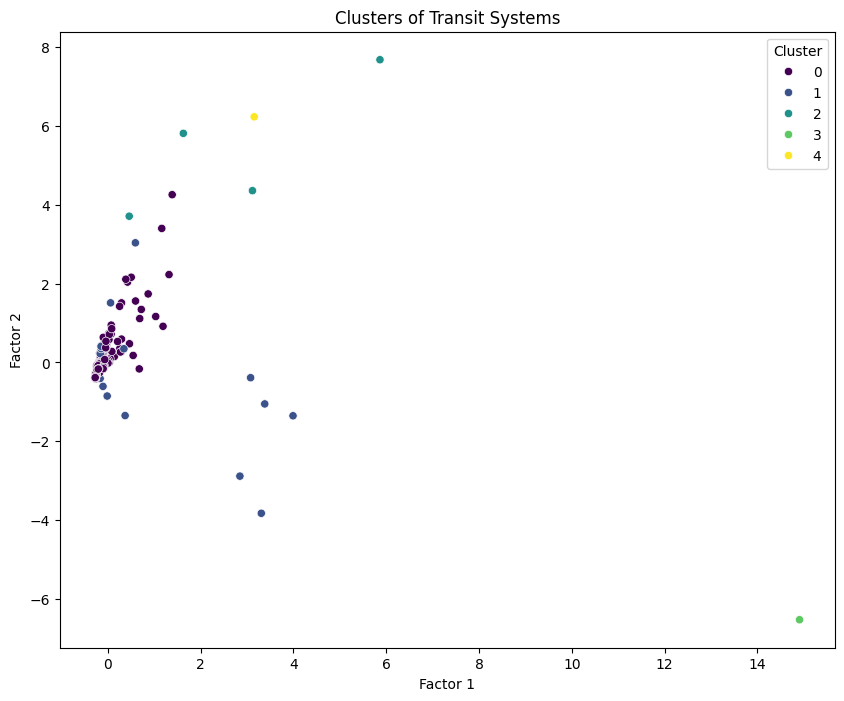

In [57]:
# Step 5: Visualization
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()

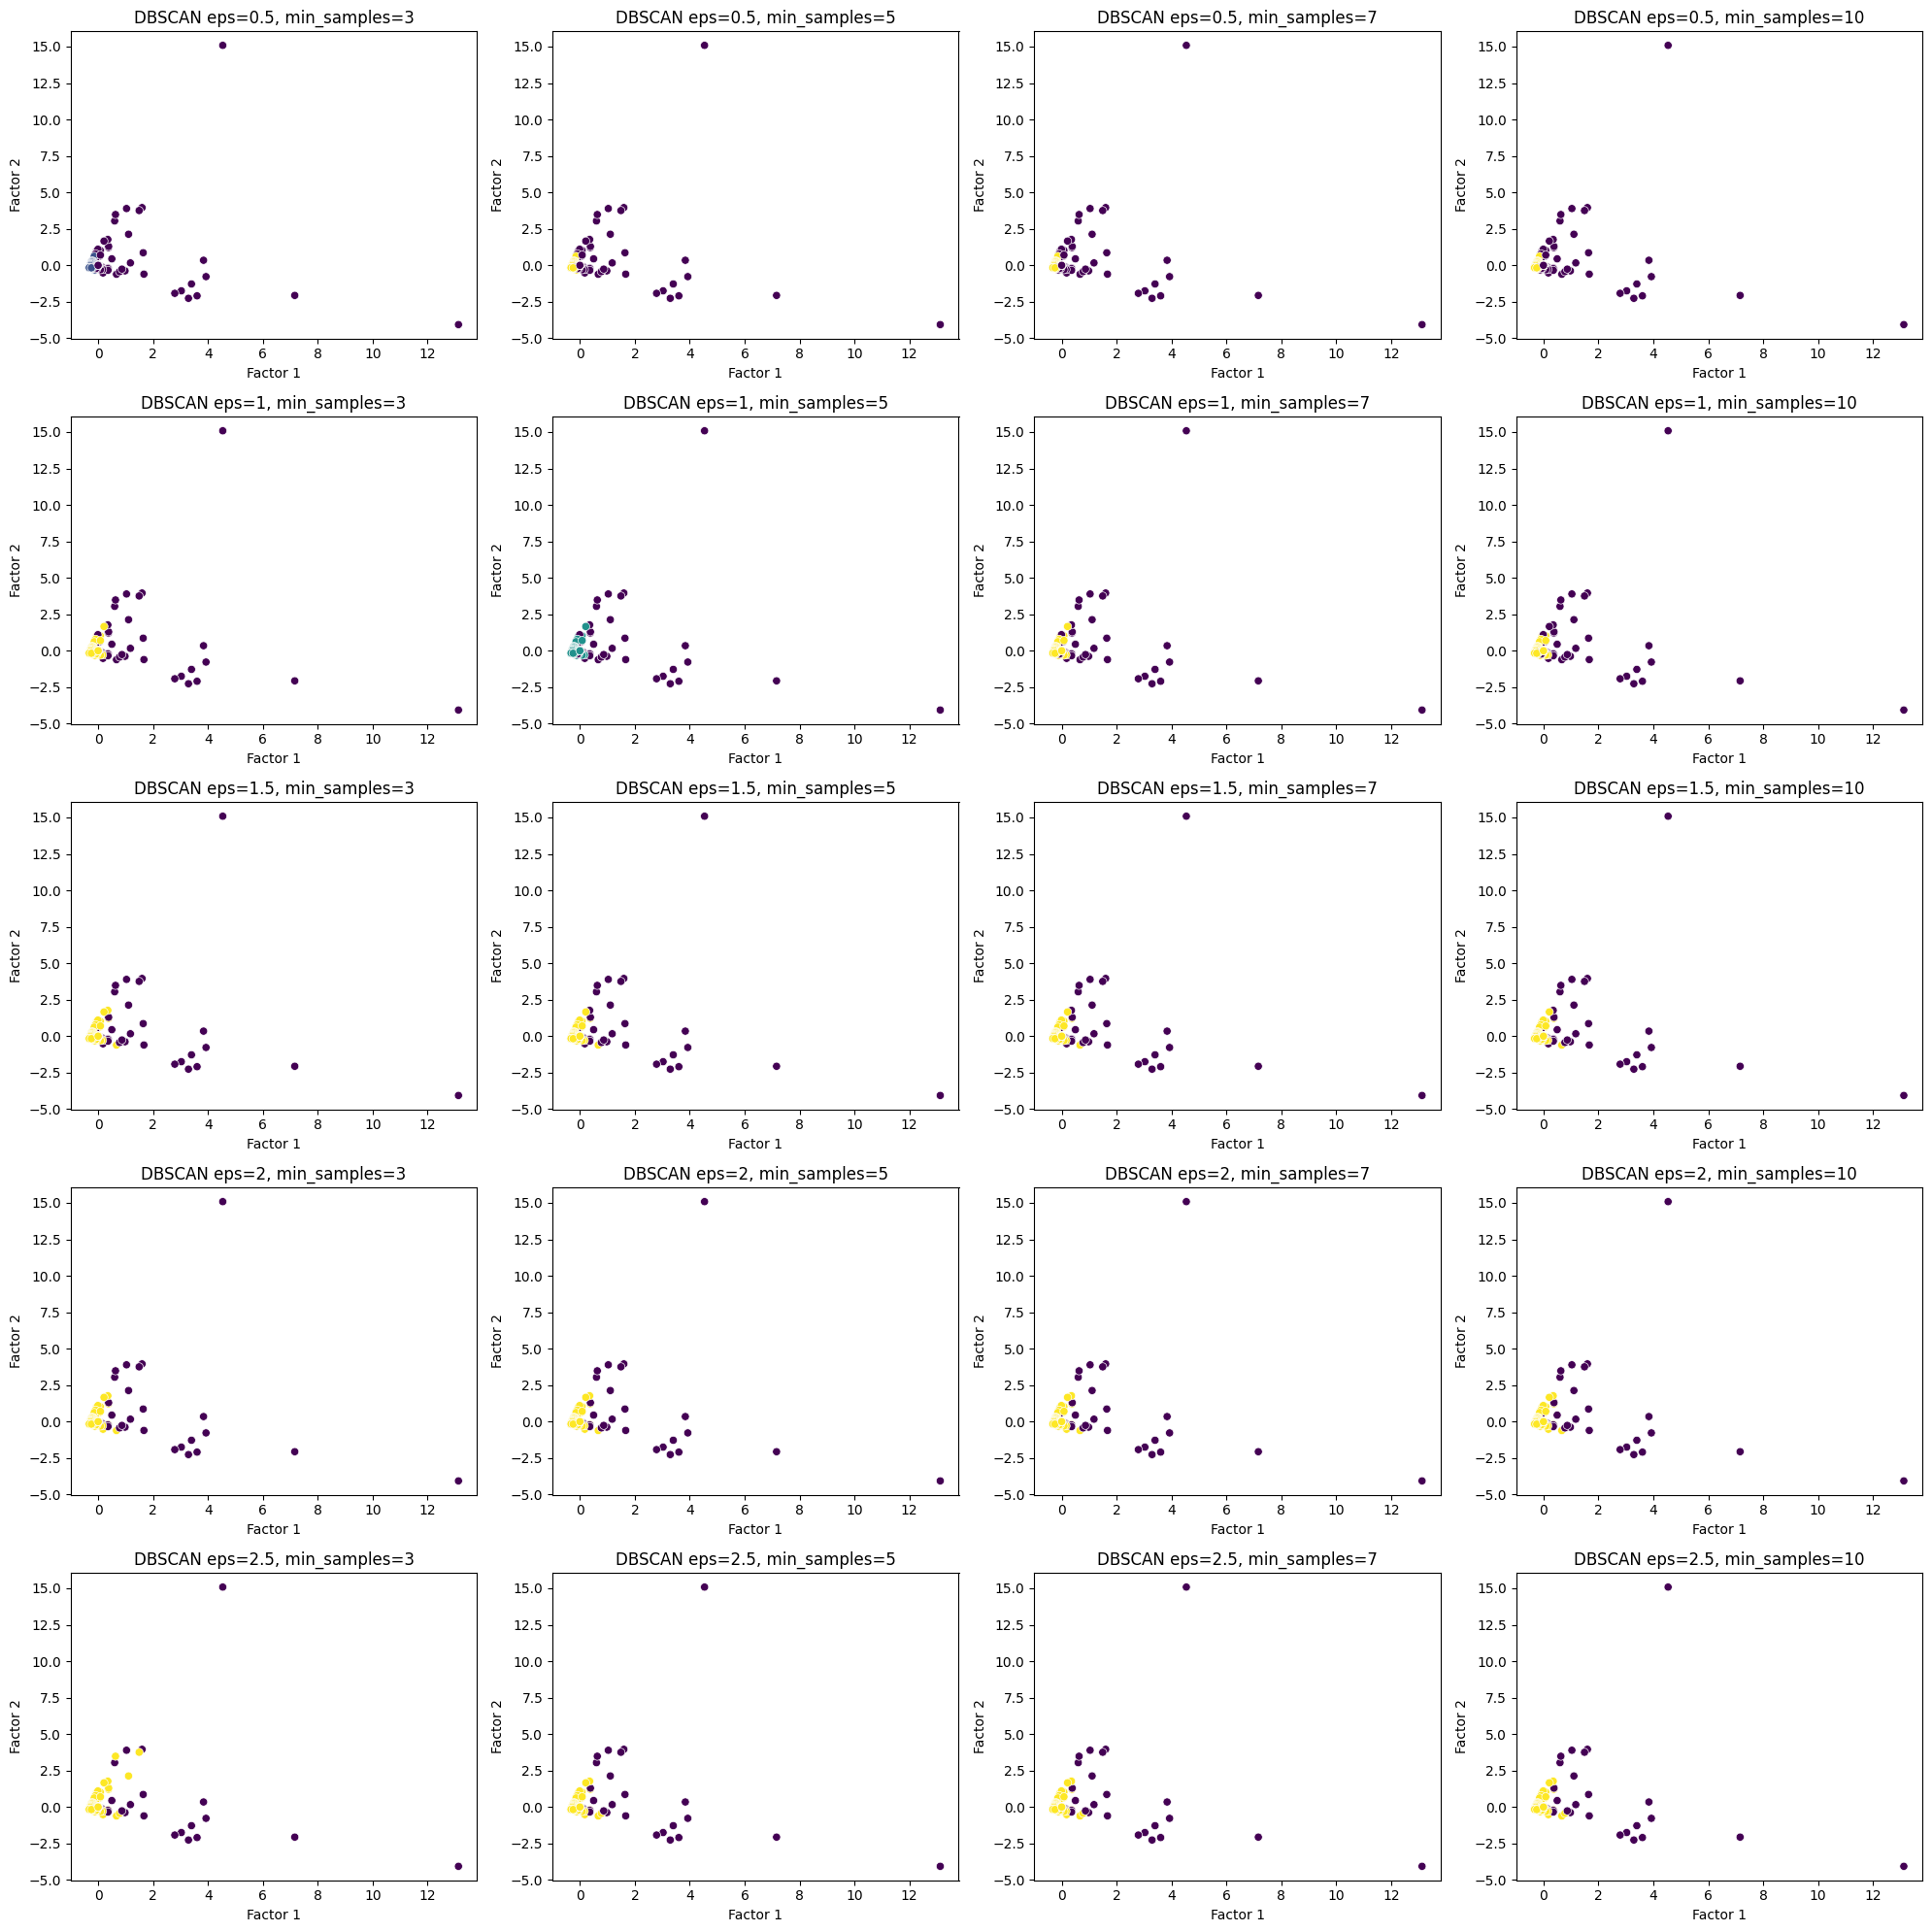

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(data_path)

# Step 2: Data Cleaning
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Drop non-numerical columns for this analysis
df_numerical = df[numerical_cols]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Step 3: Factor Analysis
n_factors = 10  # Define the number of factors
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)

# Step 4: Clustering using DBSCAN
# Tune DBSCAN parameters
eps_values = [0.5, 1, 1.5, 2, 2.5]
min_samples_values = [3, 5, 7, 10]

# Create subplots for visualization
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(factors)
        
        # Plot the clustering result
        sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_dbscan, palette='viridis', ax=axs[i, j], legend=None)
        axs[i, j].set_title(f'DBSCAN eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Factor 1')
        axs[i, j].set_ylabel('Factor 2')

plt.tight_layout()
plt.show()


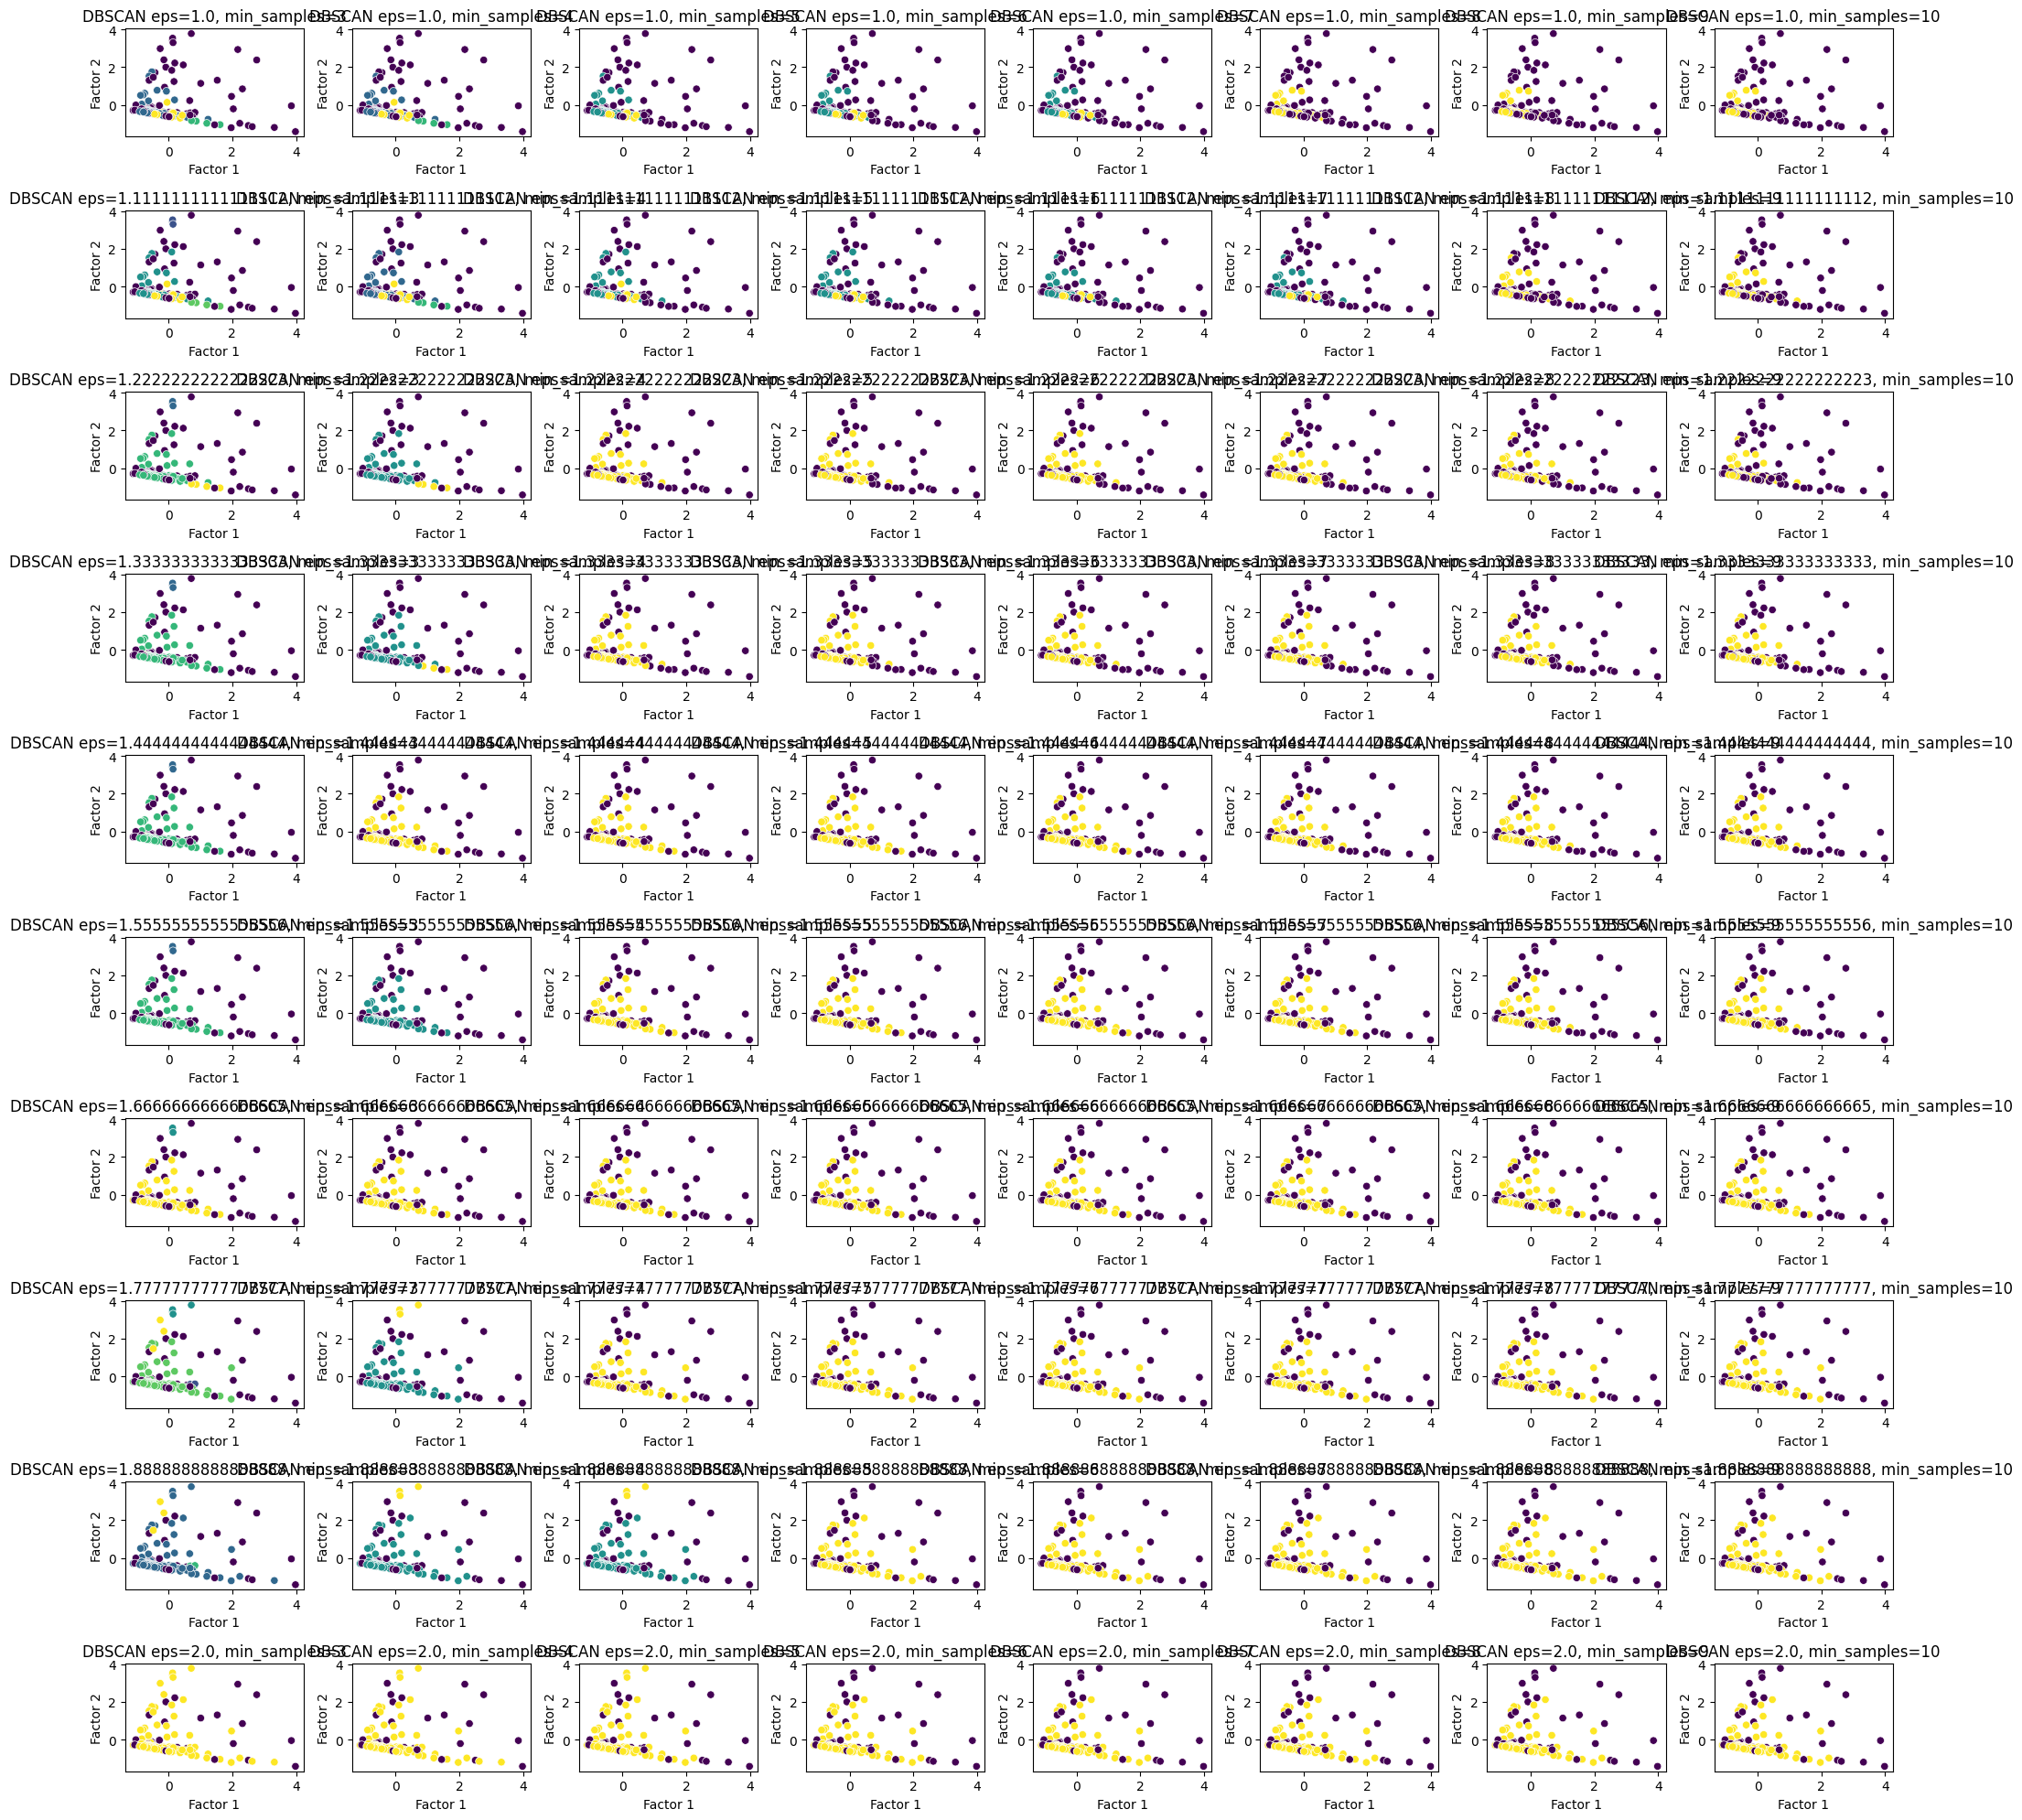

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


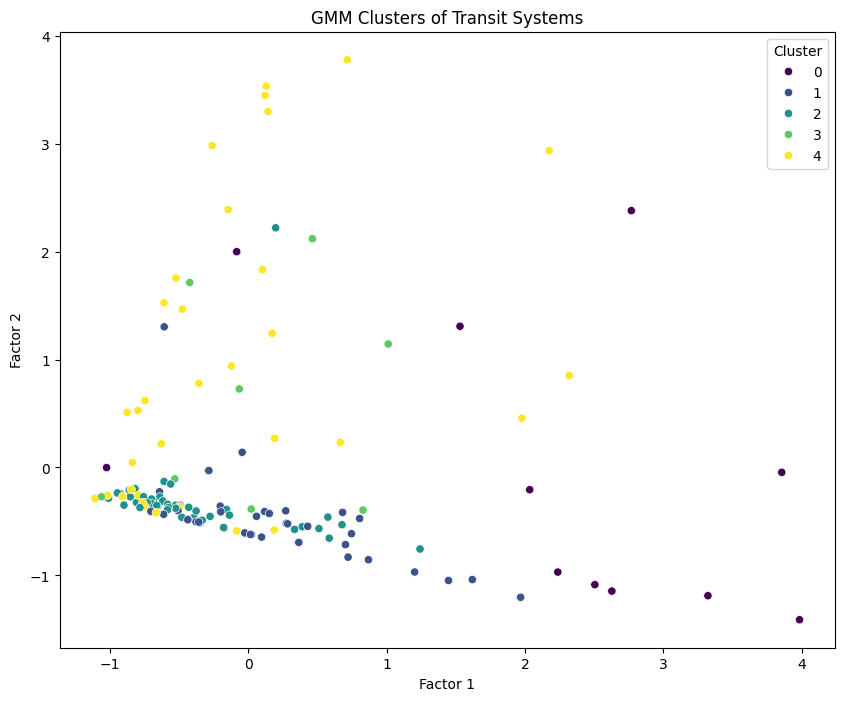

Total Employees  \
Agency                                                                
MTA New York City Transit                                194.594892   
New Jersey Transit Corporation                           194.594892   
Washington Metropolitan Area Transit Authority           194.594892   
Los Angeles County Metropolitan Transportation ...       194.594892   
Chicago Transit Authority                                194.594892   

                                                    Number of Operating Fleets  \
Agency                                                                           
MTA New York City Transit                                              50095.0   
New Jersey Transit Corporation                                         26312.0   
Washington Metropolitan Area Transit Authority                         11228.0   
Los Angeles County Metropolitan Transportation ...                     17563.0   
Chicago Transit Authority                                               4360.0   

                                                      Ridership  \
Agency                                                            
MTA New York City Transit                           491106831.0   
New Jersey Transit Corporation                      187806013.0   
Washington Metropolitan Area Transit Authority      122883834.0   
Los Angeles County Metropolitan Transportation ...  110932715.0   
Chicago Transit Authority                           115480485.0   

                                                    Service Area Population  \
Agency                                                                        
MTA New York City Transit                                         8804190.0   
New Jersey Transit Corporation                                   10594013.0   
Washington Metropolitan Area Transit Authority                    5089918.0   
Los Angeles County Metropolitan Transportation ...               10394849.0   
Chicago Transit Authority                                         3207635.0   

                                                    Service Area Sq Miles  \
Agency                                                                      
MTA New York City Transit                                           321.0   
New Jersey Transit Corporation                                     5325.0   
Washington Metropolitan Area Transit Authority                     1349.0   
Los Angeles County Metropolitan Transportation ...                 4099.0   
Chicago Transit Authority                                           310.0   

                                                    Primary UZA Area Sq Miles  \
Agency                                                                          
MTA New York City Transit                                             3248.12   
New Jersey Transit Corporation                                        3248.12   
Washington Metropolitan Area Transit Authority                        1294.51   
Los Angeles County Metropolitan Transportation ...                    1636.83   
Chicago Transit Authority                                             2337.89   

                                                    Diesel (gal)  \
Agency                                                             
MTA New York City Transit                             27958302.0   
New Jersey Transit Corporation                        35585247.0   
Washington Metropolitan Area Transit Authority         7351971.0   
Los Angeles County Metropolitan Transportation ...           0.0   
Chicago Transit Authority                             13403932.0   

                                                    Gasoline (gal)  \
Agency                                                               
MTA New York City Transit                                3570980.0   
New Jersey Transit Corporation                           1805901.0   
Washington Metropolitan Area Transit Authority           1812002.0   
Los Angeles County M

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(data_path)

# Data Cleaning and Outlier Analysis
df.set_index('Agency', inplace=True)
df = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])
df = df.loc[:, df.isnull().mean() < 0.5]
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df_numerical = df[numerical_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
Q1 = np.percentile(df_scaled, 25, axis=0)
Q3 = np.percentile(df_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers = ((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df_scaled[~outliers]

# Factor Analysis
n_factors = 10
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_cleaned)

# DBSCAN Clustering with finer tuning
eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(factors)
        sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_dbscan, palette='viridis', ax=axs[i, j], legend=None)
        axs[i, j].set_title(f'DBSCAN eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Factor 1')
        axs[i, j].set_ylabel('Factor 2')

plt.tight_layout()
plt.show()

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_gmm, palette='viridis')
plt.title('GMM Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()

# Output the dataframe with clusters
df['Cluster_DBSCAN'] = np.nan
df.loc[~outliers, 'Cluster_DBSCAN'] = clusters_dbscan
df['Cluster_GMM'] = np.nan
df.loc[~outliers, 'Cluster_GMM'] = clusters_gmm

output_path = 'NTD_Clustered_Data.csv'
df.to_csv(output_path, index=False)
df.head()


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(data_path)
df.set_index('Agency', inplace=True)
df = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])

# Data Cleaning and Outlier Analysis
df = df.loc[:, df.isnull().mean() < 0.5]
numerical_cols = df.select_dtypes(include=[np.number]).columns
non_numerical_cols = df.select_dtypes(exclude=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df_numerical = df[numerical_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
#Q1 = np.percentile(df_scaled, 25, axis=0)
#Q3 = np.percentile(df_scaled, 75, axis=0)
#IQR = Q3 - Q1
#outliers = ((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)
#df_cleaned = df_scaled[~outliers]
df_cleaned = df_scaled

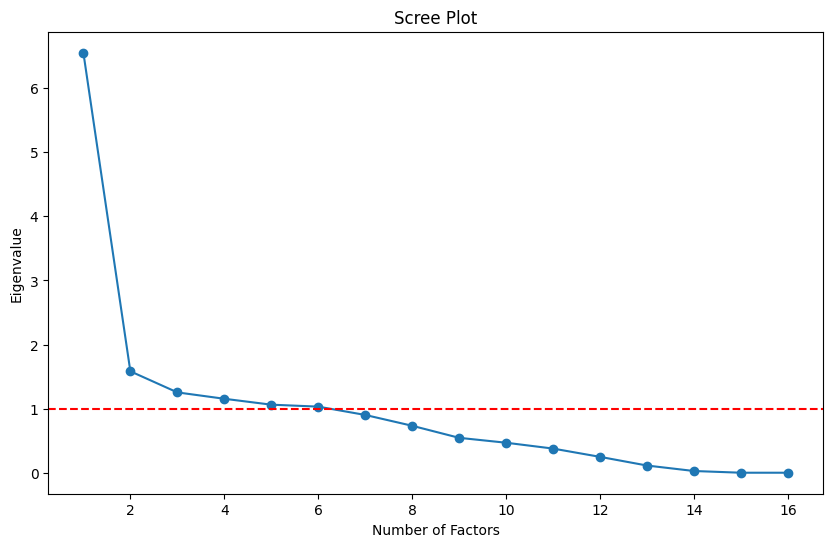

Number of factors based on Kaiser criterion: 6


In [62]:
### Kaiser Criterion and Scree Plot

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to get eigenvalues
pca = PCA()
pca.fit(df_cleaned)

# Get eigenvalues
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser Criterion line
plt.show()

# Determine the number of factors based on the Kaiser criterion
n_factors_kaiser = sum(eigenvalues > 1)
print(f'Number of factors based on Kaiser criterion: {n_factors_kaiser}')

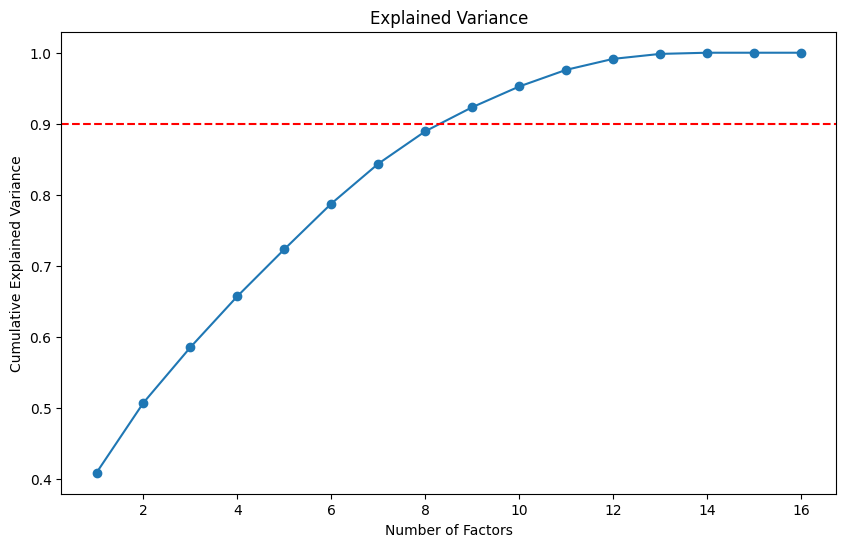

Number of factors needed to explain 90% of the variance: 9


In [63]:
### Explained variance

# Fit PCA to get explained variance
pca = PCA()
pca.fit(df_cleaned)

# Get cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')  # 90% explained variance line
plt.show()

# Determine the number of factors needed to explain 90% of the variance
n_factors_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f'Number of factors needed to explain 90% of the variance: {n_factors_variance}')


In [64]:
# Factor Analysis

import math
n_factors = math.ceil((n_factors_kaiser+n_factors_variance)/2)
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_cleaned)

# Output the factor loadings
loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor_{i+1}' for i in range(n_factors)], index=numerical_cols)
print(loadings.head())

                            Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  \
Total Employees             0.005066  0.135658  0.135391  0.006453  0.061188   
Number of Operating Fleets  0.814266  0.158685  0.327243  0.100492  0.041700   
Ridership                   0.931818  0.087837  0.201628  0.069235  0.047171   
Service Area Population     0.501109  0.134653  0.423250  0.113073 -0.011890   
Service Area Sq Miles       0.061169  0.027653  0.181428  0.040446  0.001189   

                            Factor_6  Factor_7  Factor_8  
Total Employees             0.172712  0.094722 -0.123296  
Number of Operating Fleets  0.274365 -0.003492  0.309103  
Ridership                   0.153181  0.018241  0.139349  
Service Area Population    -0.109416  0.680605  0.019216  
Service Area Sq Miles       0.072057  0.321054  0.002419  


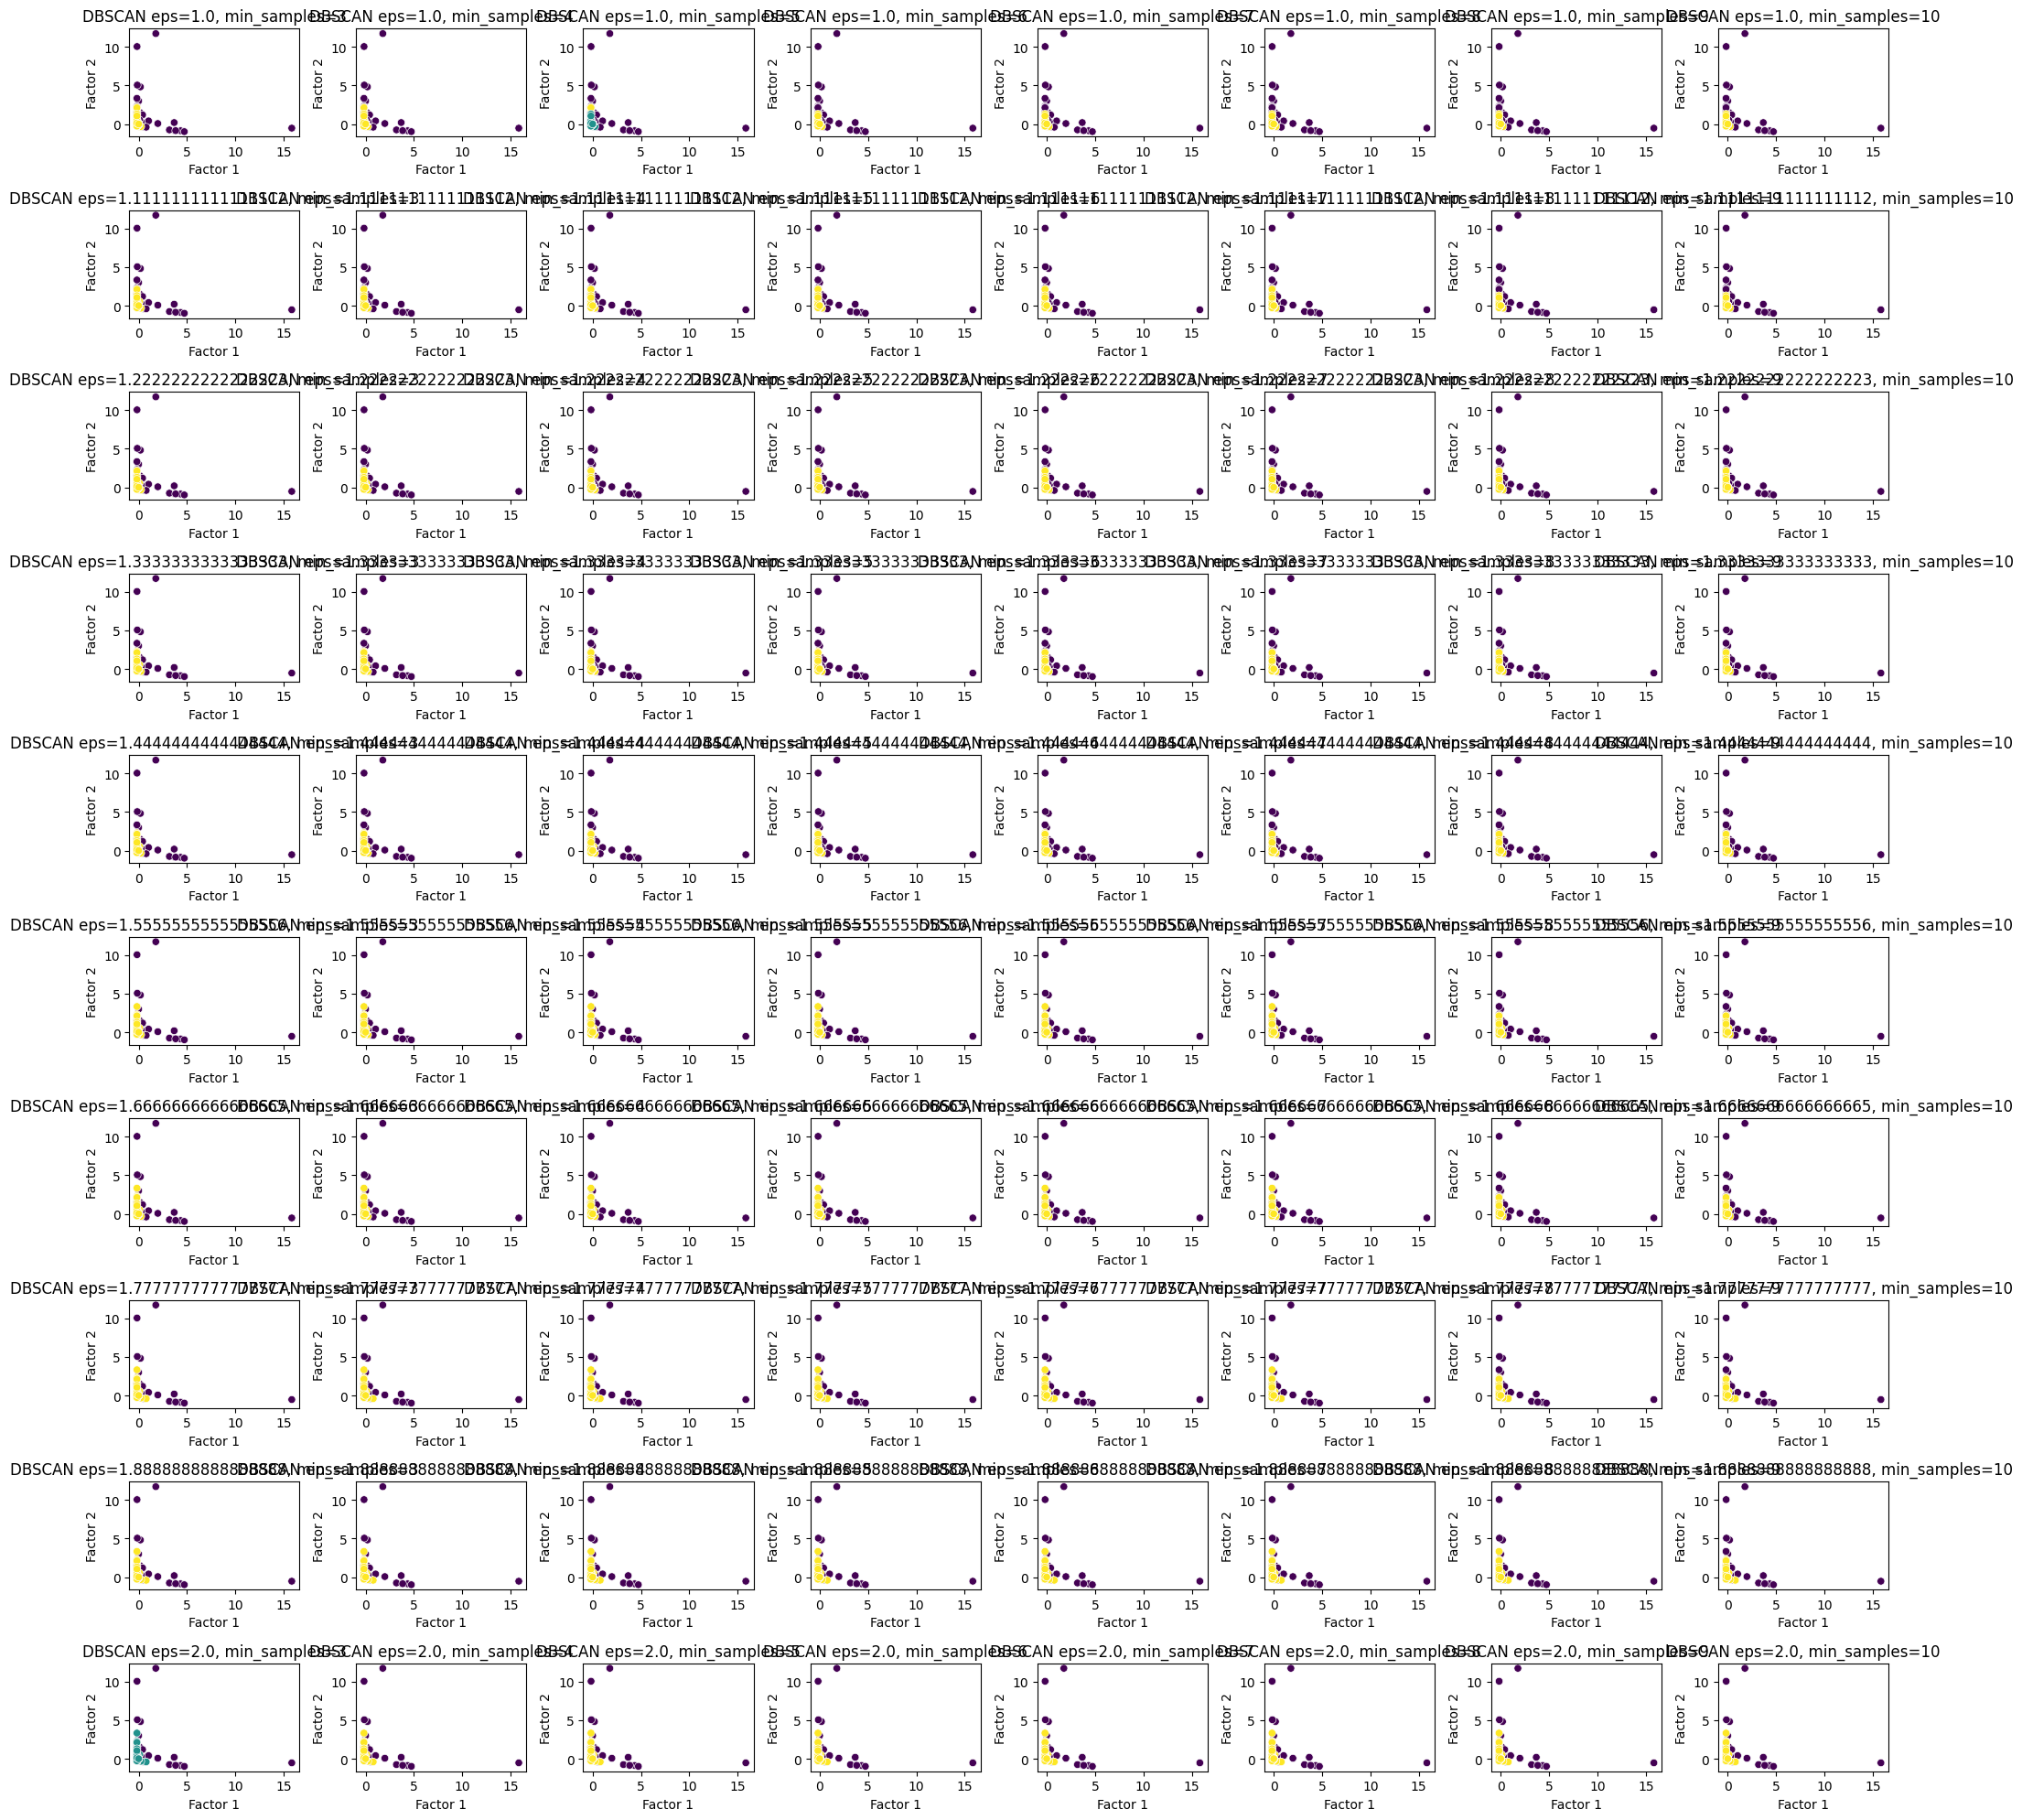

In [65]:
# Clustering using DBSCAN with fine tuning
eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(factors)
        sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_dbscan, palette='viridis', ax=axs[i, j], legend=None)
        axs[i, j].set_title(f'DBSCAN eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Factor 1')
        axs[i, j].set_ylabel('Factor 2')

plt.tight_layout()
plt.show()


C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


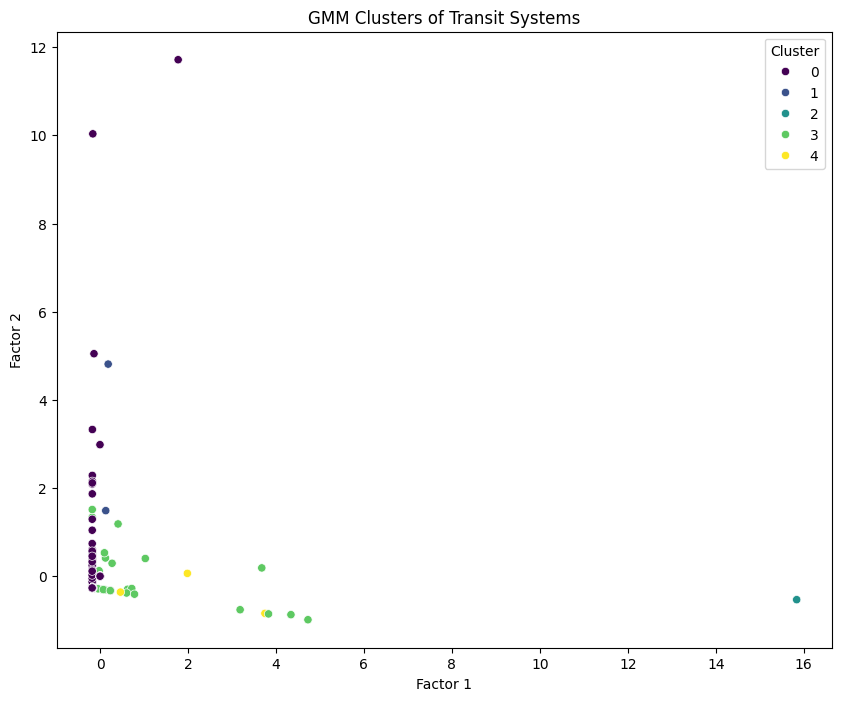

In [66]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_gmm, palette='viridis')
plt.title('GMM Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


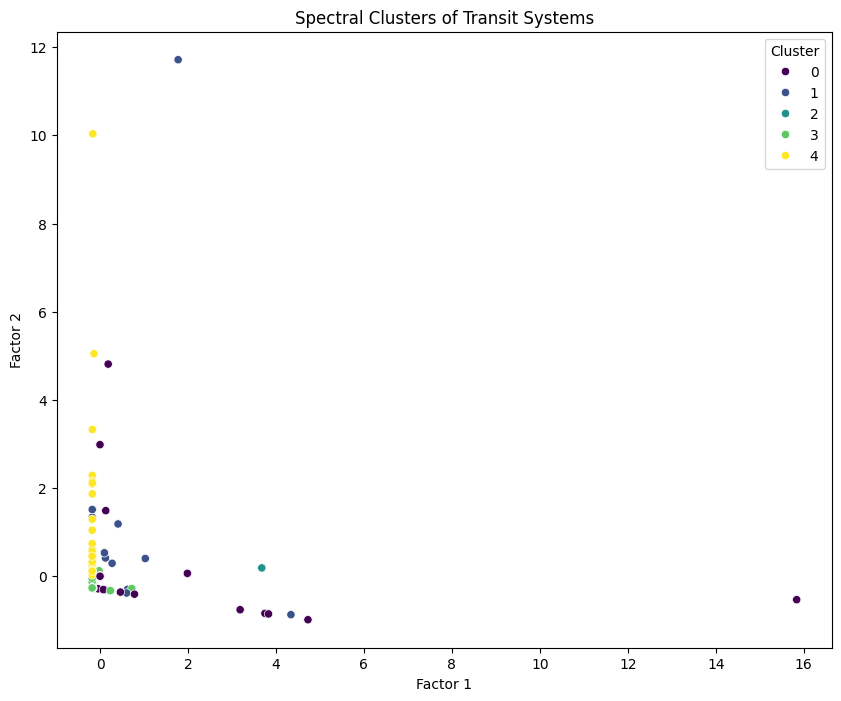

In [67]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters_spectral = spectral.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_spectral, palette='viridis')
plt.title('Spectral Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


In [85]:
# Output the dataframe with clusters
#df['Cluster_DBSCAN'] = np.nan
#df.loc[~outliers, 'Cluster_DBSCAN'] = clusters_dbscan
#df['Cluster_GMM'] = np.nan
#df.loc[~outliers, 'Cluster_GMM'] = clusters_gmm
#df['Cluster_Spectral'] = np.nan
#df.loc[~outliers, 'Cluster_Spectral'] = clusters_spectral

#output_path = 'NTD_Clustered_Data.csv'
#df.to_csv(output_path, index=False)
#df


# Output the dataframe with clusters
df['Cluster_DBSCAN'] = clusters_dbscan
df['Cluster_GMM'] = clusters_gmm
df['Cluster_Spectral'] = clusters_spectral

output_path = 'NTD_Clustered_Data.csv'
df.to_csv(output_path, index=False)
df



Total Operating Hours  \
Agency                                                                      
MTA New York City Transit                                             0.0   
New Jersey Transit Corporation                                        0.0   
Washington Metropolitan Area Transit Authority                        0.0   
Los Angeles County Metropolitan Transportation ...                    0.0   
Chicago Transit Authority                                             0.0   
...                                                                   ...   
Chicago Water Taxi (Wendella)                                         0.0   
North Front Range Transportation and Air Qualit...                    0.0   
Charlotte County Government, dba: Charlotte Cou...                    0.0   
City of Colorado Springs, dba: Mountain Metropo...                    0.0   
The Transportation Management Association Group                     423.0   

                                                    Total Employees  \
Agency                                                                
MTA New York City Transit                                      0.00   
New Jersey Transit Corporation                                 0.00   
Washington Metropolitan Area Transit Authority                 0.00   
Los Angeles County Metropolitan Transportation ...             0.00   
Chicago Transit Authority                                      0.00   
...                                                             ...   
Chicago Water Taxi (Wendella)                                 17.00   
North Front Range Transportation and Air Qualit...             4.00   
Charlotte County Government, dba: Charlotte Cou...             2.13   
City of Colorado Springs, dba: Mountain Metropo...             1.17   
The Transportation Management Association Group                0.21   

                                                    Number of Operating Fleets  \
Agency                                                                           
MTA New York City Transit                                              50095.0   
New Jersey Transit Corporation                                         26312.0   
Washington Metropolitan Area Transit Authority                         11228.0   
Los Angeles County Metropolitan Transportation ...                     17563.0   
Chicago Transit Authority                                               4360.0   
...                                                                        ...   
Chicago Water Taxi (Wendella)                                              2.0   
North Front Range Transportation and Air Qualit...                        32.0   
Charlotte County Government, dba: Charlotte Cou...                        34.0   
City of Colorado Springs, dba: Mountain Metropo...                       380.0   
The Transportation Management Association Group                           76.0   

                                                      Ridership  \
Agency                                                            
MTA New York City Transit                           491106831.0   
New Jersey Transit Corporation                      187806013.0   
Washington Metropolitan Area Transit Authority      122883834.0   
Los Angeles County Metropolitan Transportation ...  110932715.0   
Chicago Transit Authority                           115480485.0   
...                                                         ...   
Chicago Water Taxi (Wendella)                             600.0   
North Front Range Transportation and Air Qualit...     368136.0   
Charlotte County Government, dba: Charlotte Cou...     466622.0   
City of Colorado Springs, dba: Mountain Metropo...    3722824.0   
The Transportation Management Association Group        623156.0   

                                                    Service Area Population  \
Agency                                                                        
MTA New York City Transit    

#  Principal Component Analysis (PCA), Factor Analysis (FA), and multiple clustering methods (KMeans, DBSCAN, Gaussian Mixture Model, and Spectral Clustering). 

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans


## Loading, preprocessing data, data cleaning and scaling:

In [72]:
# Step 1: Load the data
data_path = r'../../data/tidy/NTD_Annual_Data_Tidy_v01.csv'
df = pd.read_csv(data_path)
df.set_index('Agency', inplace=True)
df = df.drop(columns=['NTD ID', 'City', 'State', 'UZA Name'])

# Data Cleaning and Scaling
#df = df.loc[:, df.isnull().mean() < 0.5]
numerical_cols = df.select_dtypes(include=[np.number]).columns
#df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[numerical_cols] = df[numerical_cols].fillna(0)
df_scaled = StandardScaler().fit_transform(df[numerical_cols])

In [73]:
df

Total Operating Hours  \
Agency                                                                      
MTA New York City Transit                                             0.0   
New Jersey Transit Corporation                                        0.0   
Washington Metropolitan Area Transit Authority                        0.0   
Los Angeles County Metropolitan Transportation ...                    0.0   
Chicago Transit Authority                                             0.0   
...                                                                   ...   
Chicago Water Taxi (Wendella)                                         0.0   
North Front Range Transportation and Air Qualit...                    0.0   
Charlotte County Government, dba: Charlotte Cou...                    0.0   
City of Colorado Springs, dba: Mountain Metropo...                    0.0   
The Transportation Management Association Group                     423.0   

                                                    Total Employees  \
Agency                                                                
MTA New York City Transit                                      0.00   
New Jersey Transit Corporation                                 0.00   
Washington Metropolitan Area Transit Authority                 0.00   
Los Angeles County Metropolitan Transportation ...             0.00   
Chicago Transit Authority                                      0.00   
...                                                             ...   
Chicago Water Taxi (Wendella)                                 17.00   
North Front Range Transportation and Air Qualit...             4.00   
Charlotte County Government, dba: Charlotte Cou...             2.13   
City of Colorado Springs, dba: Mountain Metropo...             1.17   
The Transportation Management Association Group                0.21   

                                                    Number of Operating Fleets  \
Agency                                                                           
MTA New York City Transit                                              50095.0   
New Jersey Transit Corporation                                         26312.0   
Washington Metropolitan Area Transit Authority                         11228.0   
Los Angeles County Metropolitan Transportation ...                     17563.0   
Chicago Transit Authority                                               4360.0   
...                                                                        ...   
Chicago Water Taxi (Wendella)                                              2.0   
North Front Range Transportation and Air Qualit...                        32.0   
Charlotte County Government, dba: Charlotte Cou...                        34.0   
City of Colorado Springs, dba: Mountain Metropo...                       380.0   
The Transportation Management Association Group                           76.0   

                                                      Ridership  \
Agency                                                            
MTA New York City Transit                           491106831.0   
New Jersey Transit Corporation                      187806013.0   
Washington Metropolitan Area Transit Authority      122883834.0   
Los Angeles County Metropolitan Transportation ...  110932715.0   
Chicago Transit Authority                           115480485.0   
...                                                         ...   
Chicago Water Taxi (Wendella)                             600.0   
North Front Range Transportation and Air Qualit...     368136.0   
Charlotte County Government, dba: Charlotte Cou...     466622.0   
City of Colorado Springs, dba: Mountain Metropo...    3722824.0   
The Transportation Management Association Group        623156.0   

                                                    Service Area Population  \
Agency                                                                        
MTA New York City Transit    

In [87]:
print(df.dtypes)

Total Operating Hours              float64
Total Employees                    float64
Number of Operating Fleets         float64
Ridership                          float64
Service Area Population            float64
Service Area Sq Miles              float64
Primary UZA Area Sq Miles          float64
Diesel (gal)                       float64
Gasoline (gal)                     float64
Liquefied Petroleum Gas (gal)      float64
Compressed Natural Gas (gal)       float64
Bio Diesel (gal)                   float64
Other Fuel (gal/gal equivalent)    float64
Electric Propulsion (kWh)          float64
Electric Battery (kWh)             float64
Total Diesel (gal)                 float64
Total kWh                          float64
Cluster_DBSCAN                       int64
Cluster_GMM                          int64
Cluster_Spectral                     int32
Cluster_KMeans                       int32
dtype: object


## Kaiser Criterion and Scree Plot:

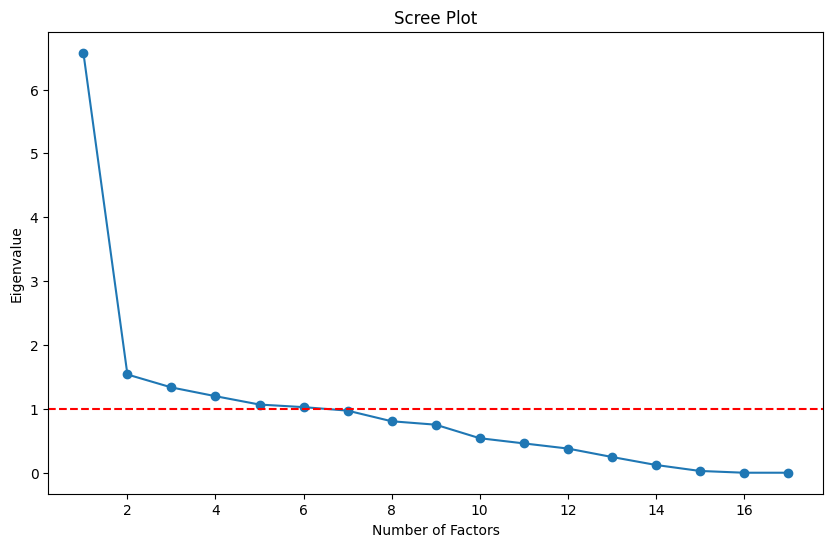

Number of factors based on Kaiser criterion: 6


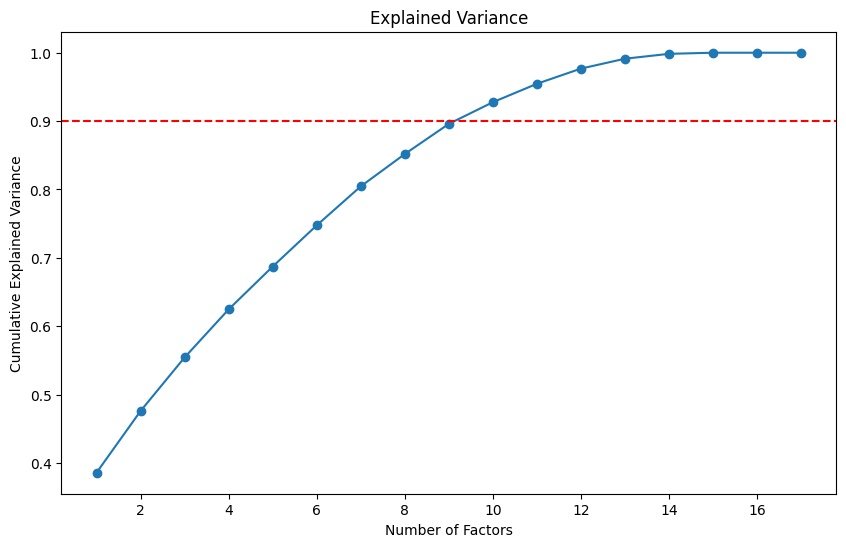

Number of factors needed to explain 90% of the variance: 10


In [88]:
# Perform PCA to get eigenvalues.
# Plot Scree Plot and explained variance to determine the number of components.

# Kaiser Criterion and Scree Plot
# Visualize the eigenvalues to decide how many principal components to retain based on the Kaiser criterion (eigenvalue > 1).

pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

n_factors_kaiser = sum(eigenvalues > 1)
print(f'Number of factors based on Kaiser criterion: {n_factors_kaiser}')

# Explained Variance
# Determine the number of components needed to explain 90% of the variance.
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

n_factors_variance = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f'Number of factors needed to explain 90% of the variance: {n_factors_variance}')

## Plot PCA Loadings

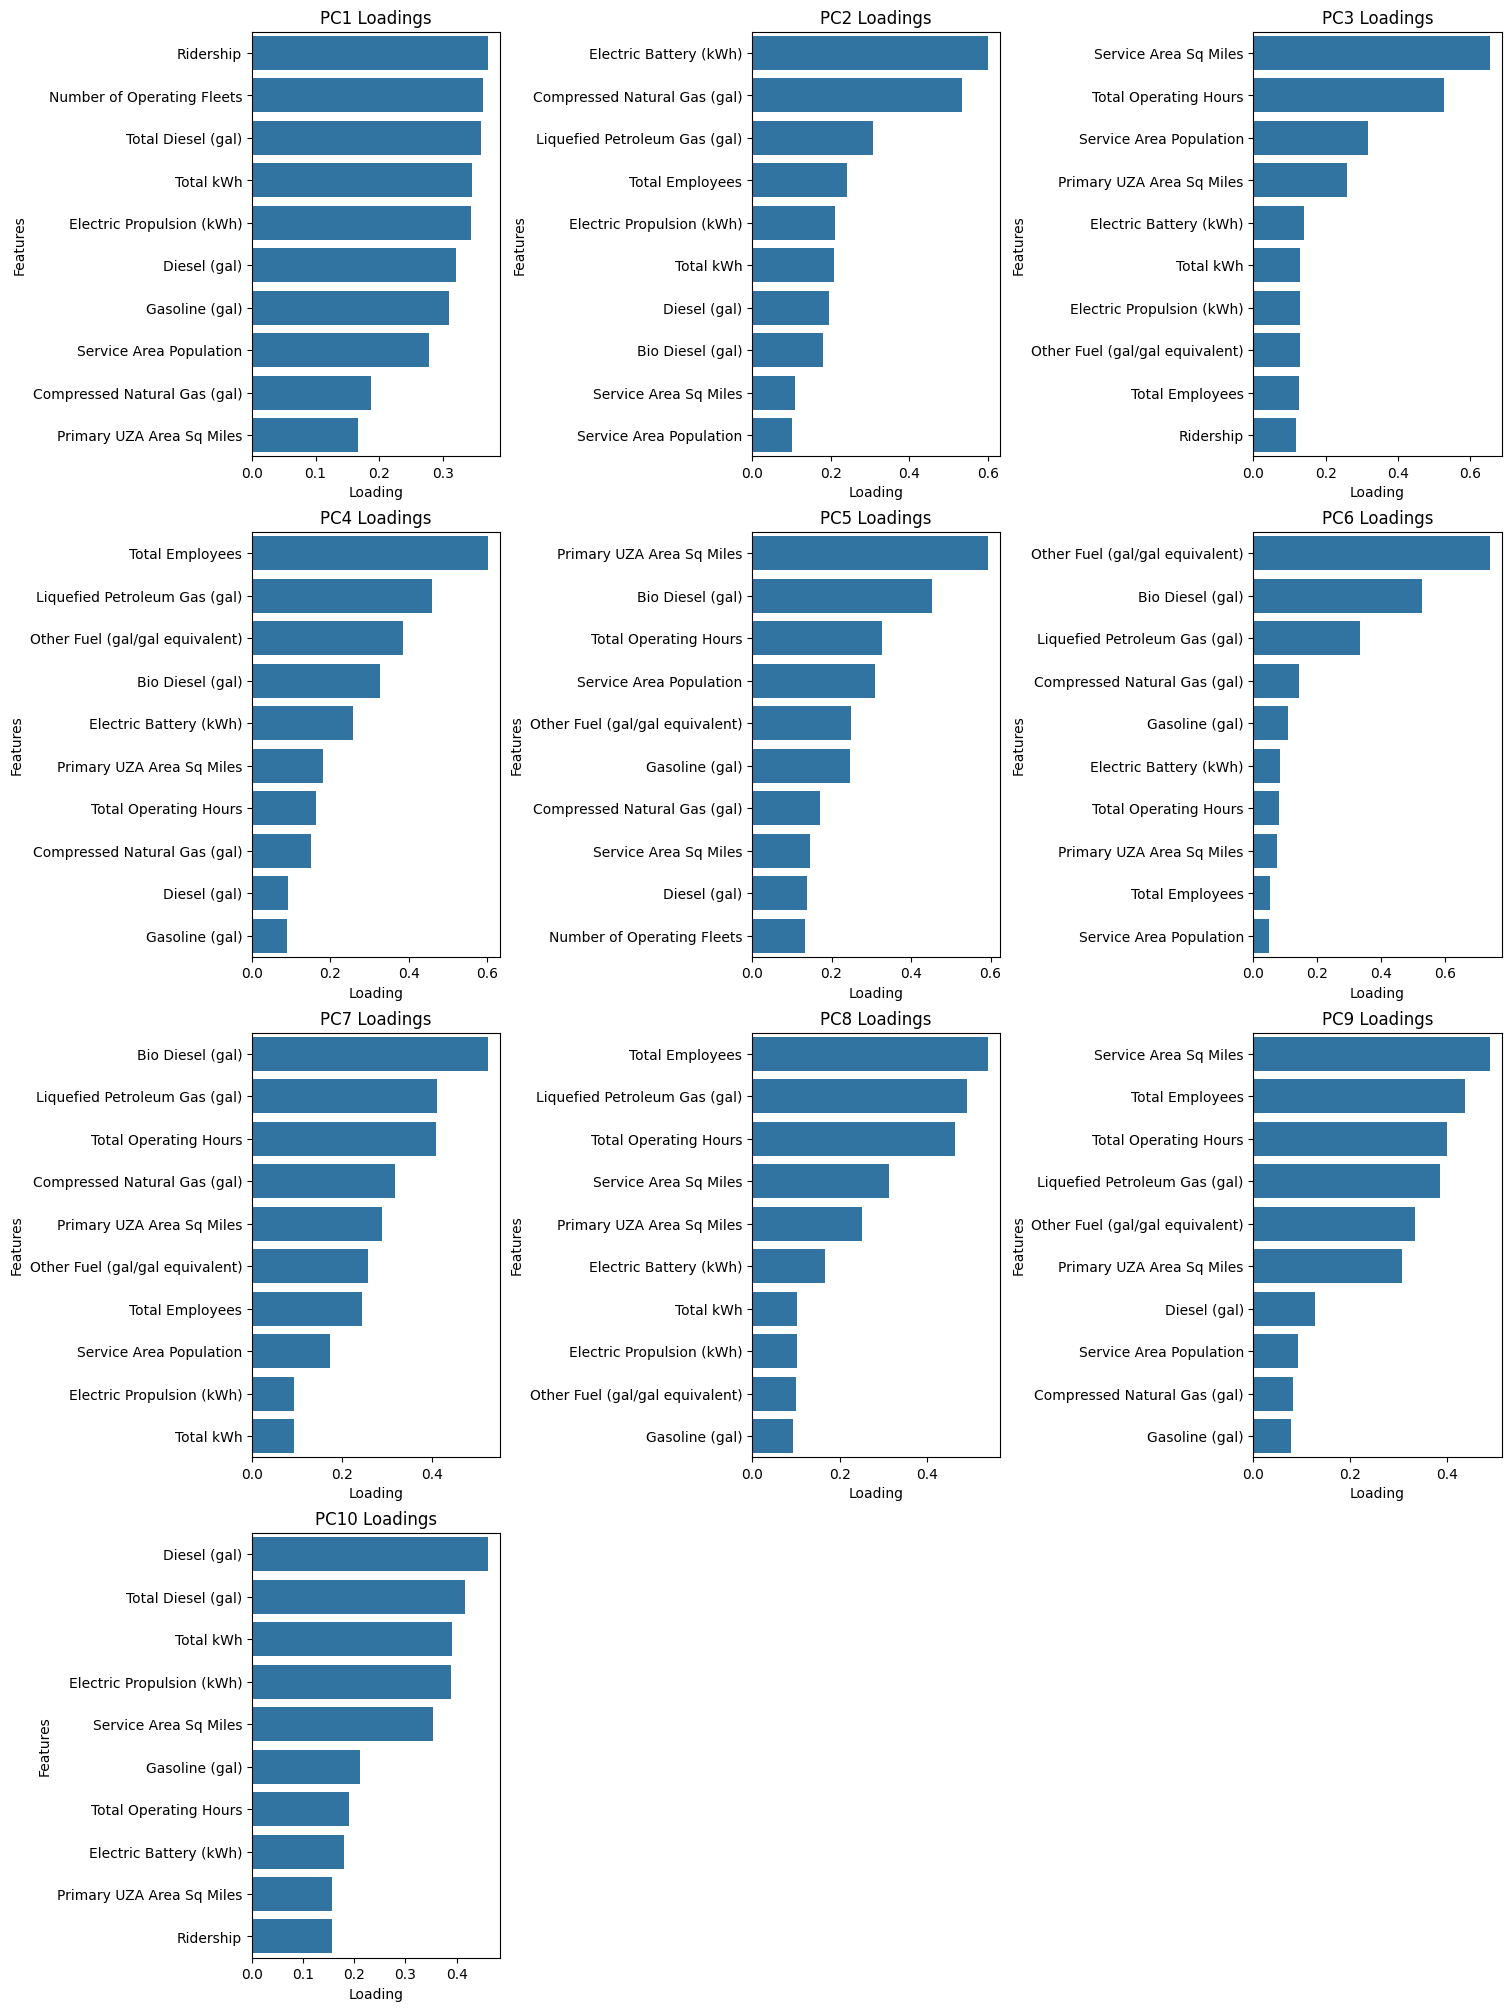

In [91]:
n_factors=10

# Principal Component Analysis with selected components
pca_selected = PCA(n_components=n_factors)
pca_selected.fit(df_scaled)

# Extract PCA loadings
selected_loadings = pd.DataFrame(pca_selected.components_.T, columns=[f'PC{i+1}' for i in range(n_factors)], index=numerical_cols)

# Plot PCA loadings for each component in a grid format
def plot_pca_loadings_grid(loadings, n_factors, top_n=10, cols=3):
    rows = math.ceil(n_factors / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i in range(n_factors):
        sorted_loadings = loadings.iloc[:, i].abs().sort_values(ascending=False)
        top_loadings = sorted_loadings.head(top_n)
        sns.barplot(x=top_loadings.values, y=top_loadings.index, ax=axes[i])
        axes[i].set_title(f'PC{i+1} Loadings')
        axes[i].set_xlabel('Loading')
        axes[i].set_ylabel('Features')
    
    # Hide any empty subplots
    for j in range(n_factors, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

plot_pca_loadings_grid(selected_loadings, n_factors, top_n=10, cols=3)


## Plot feature importances:

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


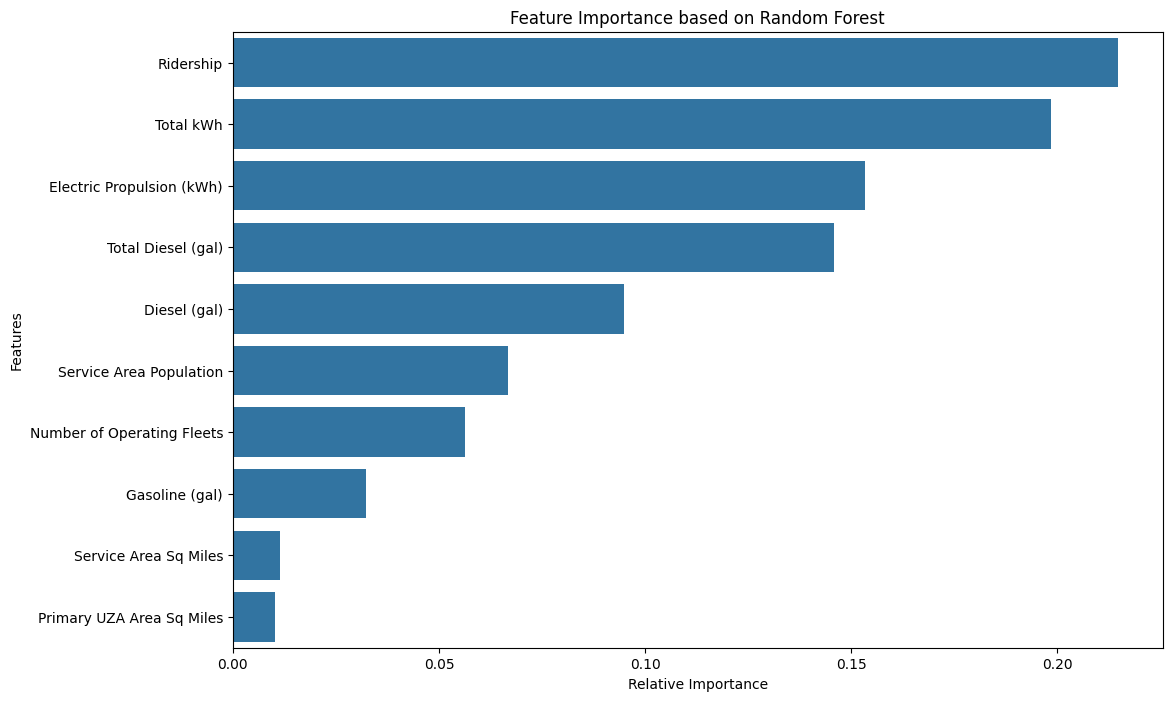

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Fit the RandomForestClassifier using the scaled data and cluster labels
rf = RandomForestClassifier(random_state=42)
rf.fit(df_scaled, clusters_kmeans)

# Extract feature importances (top 10 features)
importances = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance based on Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

## Factor analysis

In [98]:
# Factor Analysis
#n_factors = math.ceil((n_factors_kaiser + n_factors_variance) / 2)
n_factors=10
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)
loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor_{i+1}' for i in range(n_factors)], index=numerical_cols)
print(loadings.head())

                            Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  \
Total Operating Hours      -0.007864 -0.011520 -0.014937 -0.001316 -0.010578   
Total Employees            -0.122808  0.074326 -0.008451 -0.032050  0.000758   
Number of Operating Fleets  0.815048  0.156879  0.320947  0.100046  0.050885   
Ridership                   0.931706  0.084651  0.195112  0.068693  0.049851   
Service Area Population     0.504717  0.138460  0.422803  0.111703 -0.021047   

                            Factor_6  Factor_7  Factor_8  Factor_9  Factor_10  
Total Operating Hours      -0.013867 -0.003210  0.001494  0.192428   0.220662  
Total Employees             0.117321  0.167385 -0.056422 -0.026360  -0.102804  
Number of Operating Fleets  0.219127 -0.003643  0.343931  0.016467   0.005141  
Ridership                   0.117398  0.013267  0.181039  0.015751  -0.028317  
Service Area Population    -0.093679  0.009660 -0.037573  0.552493  -0.262538  


In [99]:
num_rows, num_columns = factors.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 364
Number of columns: 10


## Using the transformed data from the Factor Analysis for clustering.

###  Using the Elbow method to determine the optimal number of clusters

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

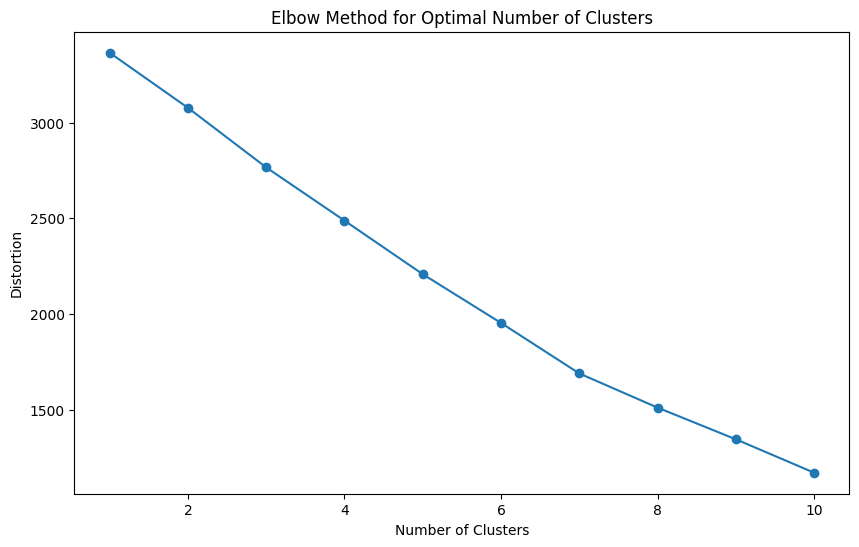

In [100]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(factors)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


## K-Means Clustering

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


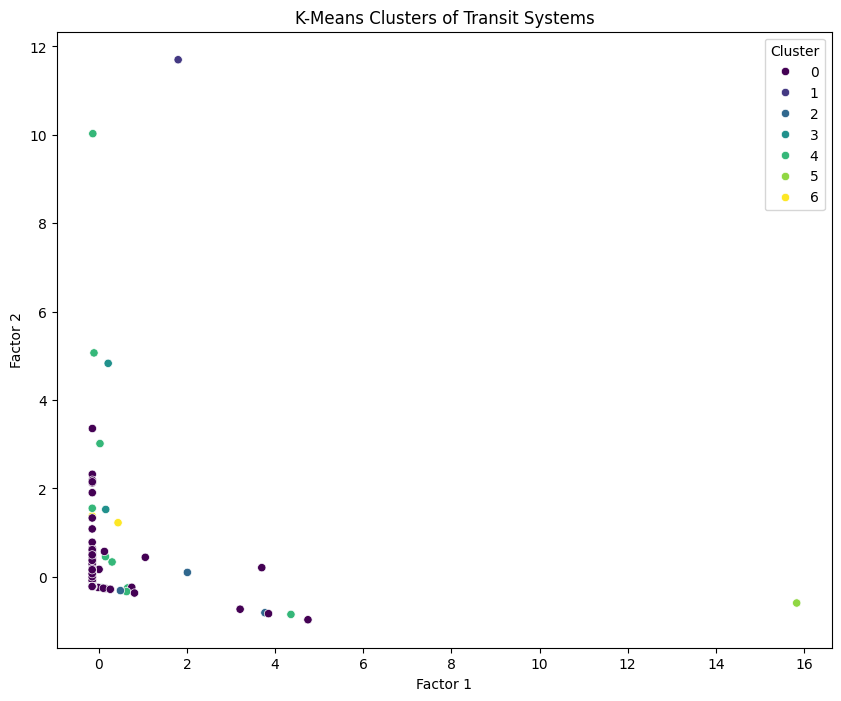

In [102]:
# K-Means Clustering
kmeans = KMeans(n_clusters=7, random_state=42)
clusters_kmeans = kmeans.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

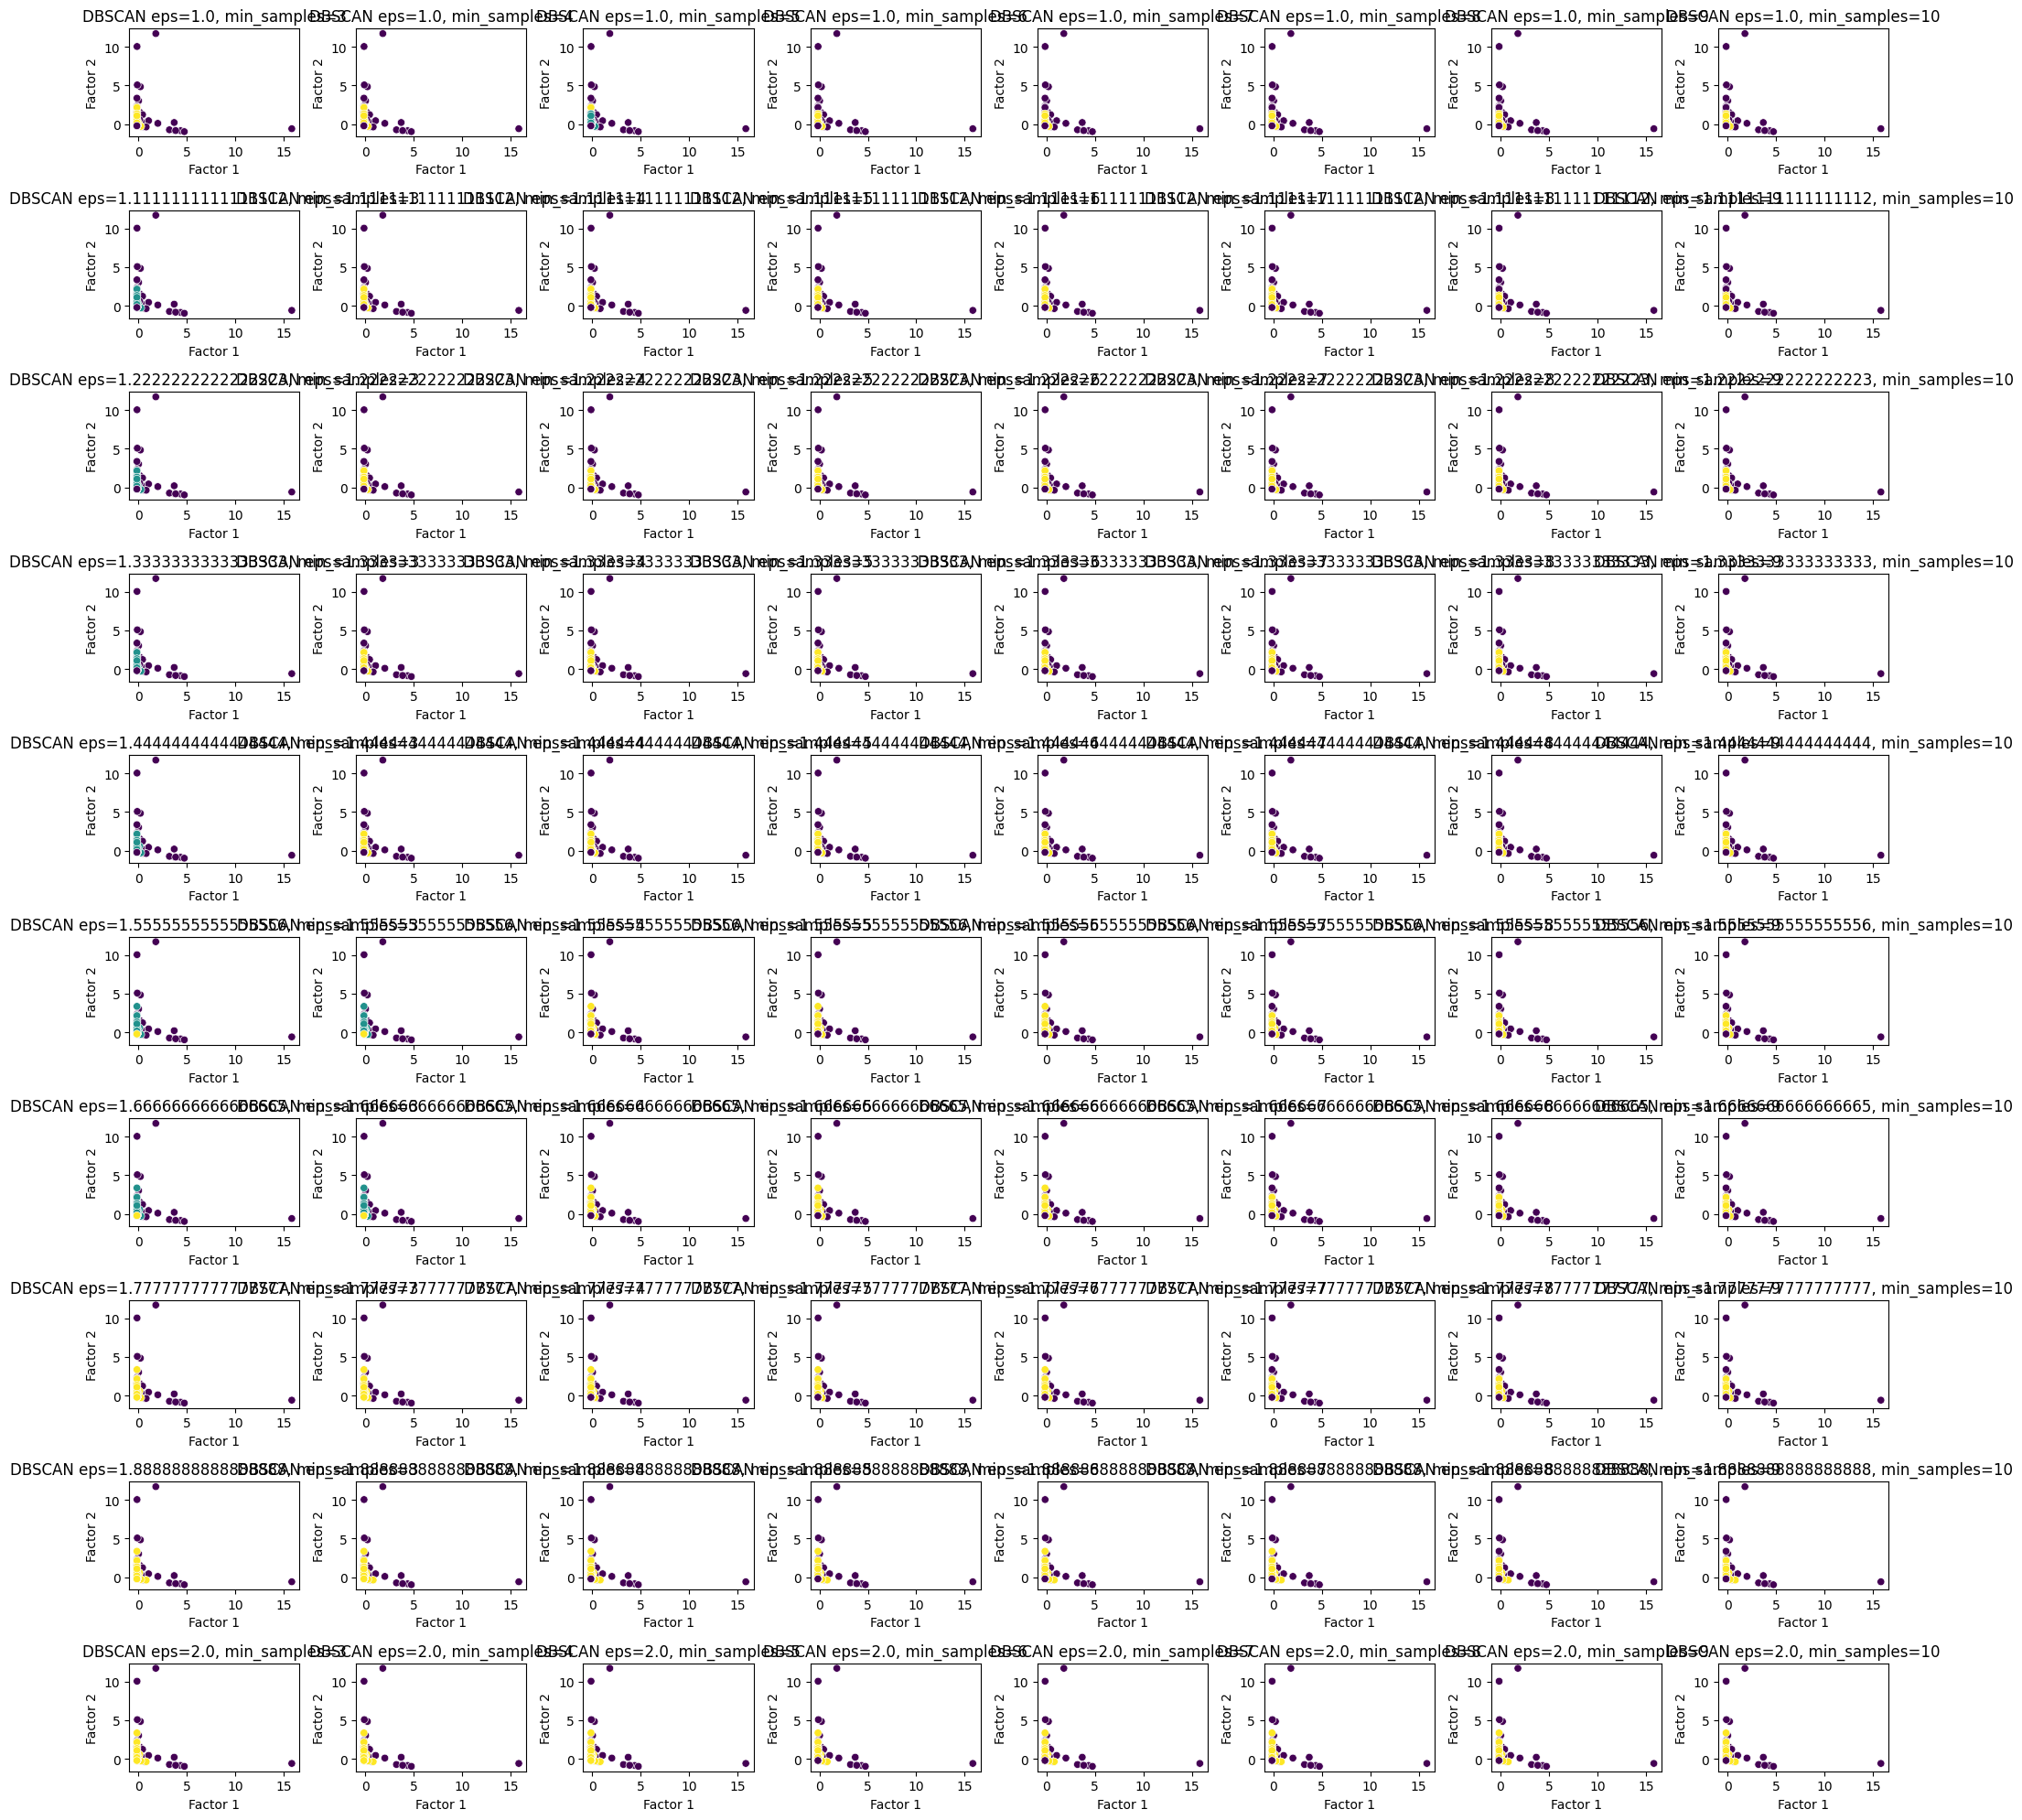

In [103]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering with fine-tuning
# Epsilon (eps): The maximum distance between two points for one to be considered as in the neighborhood of the other.
# Min Samples: The minimum number of points to form a dense region (including the point itself).

eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(factors)
        sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_dbscan, palette='viridis', ax=axs[i, j], legend=None)
        axs[i, j].set_title(f'DBSCAN eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Factor 1')
        axs[i, j].set_ylabel('Factor 2')

plt.tight_layout()
plt.show()


In [104]:
### Analyze DBSCAN results:
# eps=1.0, min_samples=10: Shows very compact clusters, but might be too tight, potentially treating many points as noise.
# eps=2.0, min_samples=3: Shows more spread-out clusters with fewer noise points, which might be a good balance.
# Small eps Values: Tend to create many small clusters and classify many points as noise. If clusters are too small or many points are noise, increase eps.
# Large eps Values: Tend to merge clusters together, potentially losing finer structure in the data. If clusters merge too much, decrease eps.
# Small min_samples Values: Can create more clusters, including small ones. If too many clusters, increase min_samples.
# Large min_samples Values: Tend to create larger clusters and treat more points as noise. If too few clusters, decrease min_samples.

In [106]:
## Silhouette Score Calculation

from sklearn.metrics import silhouette_score

best_score = -1
best_params = (0, 0)
eps_values = np.linspace(1, 2, 10)
min_samples_values = range(3, 11)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(factors)
        if len(set(clusters_dbscan)) > 1:  # To avoid silhouette score error with single cluster
            score = silhouette_score(factors, clusters_dbscan)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f'Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score: {best_score}')


Best DBSCAN params: eps=1.8888888888888888, min_samples=3 with Silhouette Score: 0.6888430117035489


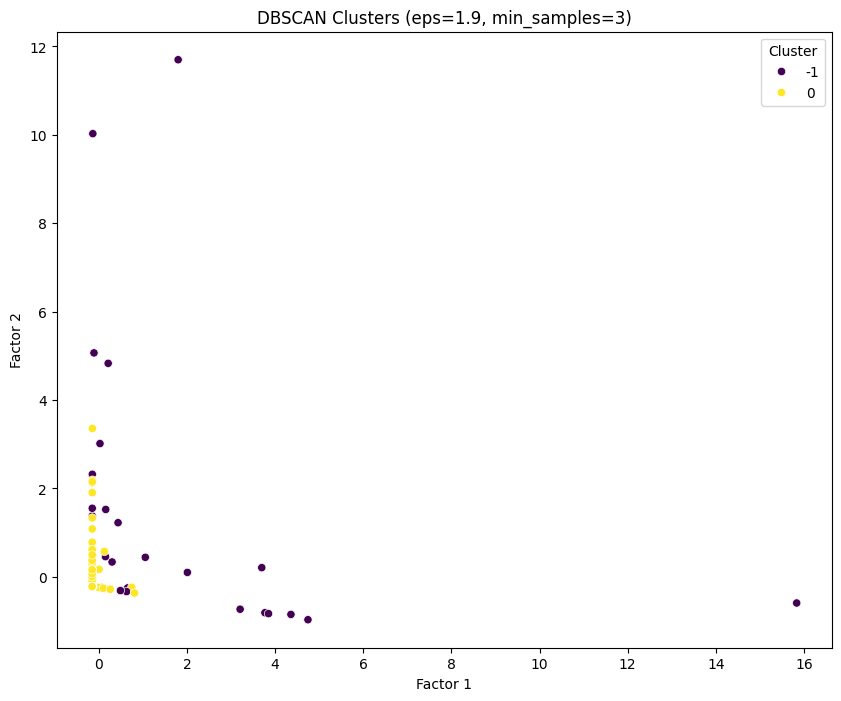

In [108]:
# Best DBSCAN parameters
best_eps = 1.9
best_min_samples = 3

# Perform DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters_dbscan = dbscan.fit_predict(factors)

# Visualize the DBSCAN clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_dbscan, palette='viridis')
plt.title(f'DBSCAN Clusters (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()
# Cluster 0: The points marked in yellow.
# Noise (-1): The points marked in purple. These are considered noise points by DBSCAN and do not belong to any cluster.

## GMM

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


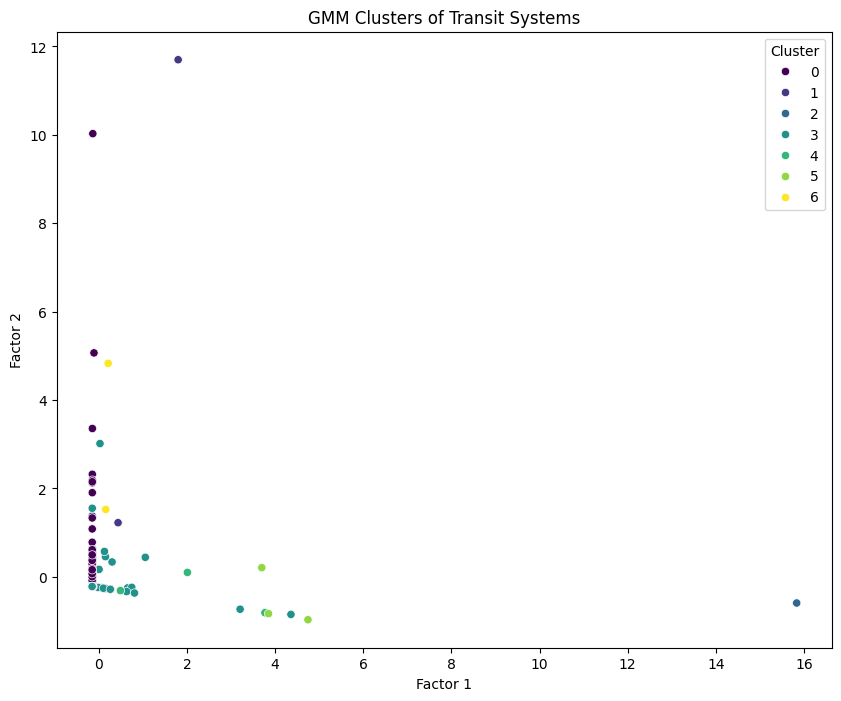

In [109]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=7, random_state=42)
clusters_gmm = gmm.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_gmm, palette='viridis')
plt.title('GMM Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


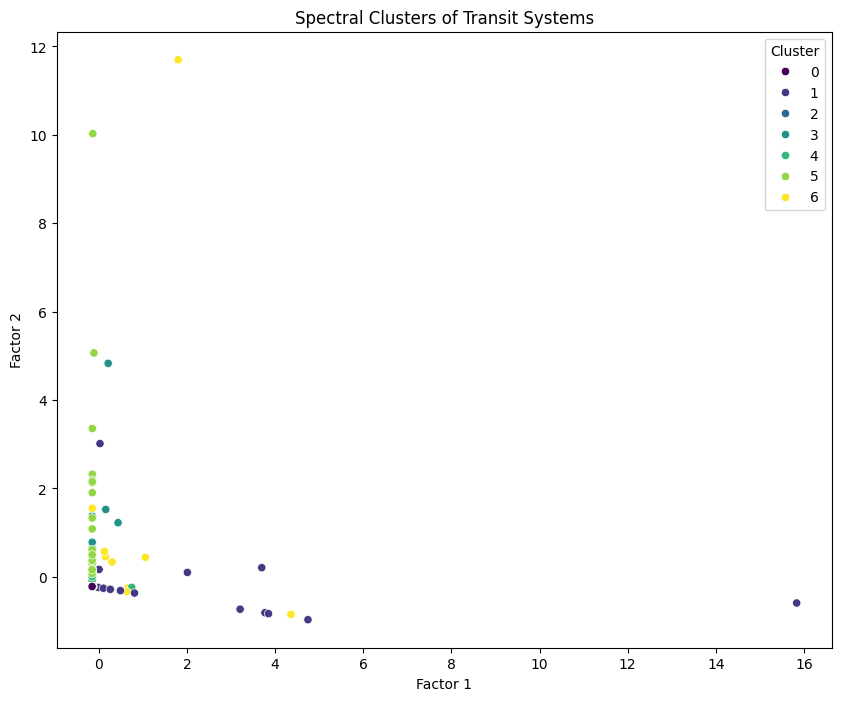

In [110]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
spectral = SpectralClustering(n_clusters=7, affinity='nearest_neighbors', random_state=42)
clusters_spectral = spectral.fit_predict(factors)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_spectral, palette='viridis')
plt.title('Spectral Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()


In [112]:
# Output the dataframe with clusters
df['Cluster_DBSCAN'] = clusters_dbscan
df['Cluster_GMM'] = clusters_gmm
df['Cluster_Spectral'] = clusters_spectral
df['Cluster_KMeans'] = clusters_kmeans

output_path = 'NTD_Clustered_Data.csv'
df.to_csv(output_path, index=False)
df


Total Operating Hours  \
Agency                                                                      
MTA New York City Transit                                             0.0   
New Jersey Transit Corporation                                        0.0   
Washington Metropolitan Area Transit Authority                        0.0   
Los Angeles County Metropolitan Transportation ...                    0.0   
Chicago Transit Authority                                             0.0   
...                                                                   ...   
Chicago Water Taxi (Wendella)                                         0.0   
North Front Range Transportation and Air Qualit...                    0.0   
Charlotte County Government, dba: Charlotte Cou...                    0.0   
City of Colorado Springs, dba: Mountain Metropo...                    0.0   
The Transportation Management Association Group                     423.0   

                                                    Total Employees  \
Agency                                                                
MTA New York City Transit                                      0.00   
New Jersey Transit Corporation                                 0.00   
Washington Metropolitan Area Transit Authority                 0.00   
Los Angeles County Metropolitan Transportation ...             0.00   
Chicago Transit Authority                                      0.00   
...                                                             ...   
Chicago Water Taxi (Wendella)                                 17.00   
North Front Range Transportation and Air Qualit...             4.00   
Charlotte County Government, dba: Charlotte Cou...             2.13   
City of Colorado Springs, dba: Mountain Metropo...             1.17   
The Transportation Management Association Group                0.21   

                                                    Number of Operating Fleets  \
Agency                                                                           
MTA New York City Transit                                              50095.0   
New Jersey Transit Corporation                                         26312.0   
Washington Metropolitan Area Transit Authority                         11228.0   
Los Angeles County Metropolitan Transportation ...                     17563.0   
Chicago Transit Authority                                               4360.0   
...                                                                        ...   
Chicago Water Taxi (Wendella)                                              2.0   
North Front Range Transportation and Air Qualit...                        32.0   
Charlotte County Government, dba: Charlotte Cou...                        34.0   
City of Colorado Springs, dba: Mountain Metropo...                       380.0   
The Transportation Management Association Group                           76.0   

                                                      Ridership  \
Agency                                                            
MTA New York City Transit                           491106831.0   
New Jersey Transit Corporation                      187806013.0   
Washington Metropolitan Area Transit Authority      122883834.0   
Los Angeles County Metropolitan Transportation ...  110932715.0   
Chicago Transit Authority                           115480485.0   
...                                                         ...   
Chicago Water Taxi (Wendella)                             600.0   
North Front Range Transportation and Air Qualit...     368136.0   
Charlotte County Government, dba: Charlotte Cou...     466622.0   
City of Colorado Springs, dba: Mountain Metropo...    3722824.0   
The Transportation Management Association Group        623156.0   

                                                    Service Area Population  \
Agency                                                                        
MTA New York City Transit    

## Final analysis:

#### KMeans Clustering:
####    Clusters Identified: 7 clusters.
####    Cluster Separation: Clusters are somewhat distinct, but there seems to be some overlap, especially in the dense lower-left region.
####    Interpretation: KMeans assumes spherical clusters of similar sizes, which might not be ideal for your data given the overlap and spread.\

#### DBSCAN Clustering:
####     Clusters Identified: 1 cluster and several noise points.
####    Cluster Separation: One dense cluster with several points identified as noise.
####    Interpretation: DBSCAN is effective at identifying outliers but may struggle with datasets that have varying cluster densities.

#### Gaussian Mixture Model (GMM) Clustering:
####    Clusters Identified: 7 clusters.
####    Cluster Separation: Similar to KMeans, with some overlap in the lower-left region.
####    Interpretation: GMM can model elliptical clusters and may provide more flexibility than KMeans, but the overlap suggests some clusters are not well-separated.

#### Spectral Clustering:
####    Clusters Identified: 7 clusters.
####    Cluster Separation: Similar separation to KMeans and GMM, with some overlap.
####    Interpretation: Spectral Clustering can capture complex cluster structures, but in this case, it seems to produce results similar to KMeans and GMM.
    
#### Given the current results, Gaussian Mixture Model (GMM) appears to be the best choice. It offers flexibility in cluster shape (elliptical clusters) and handles overlap better than KMeans.

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


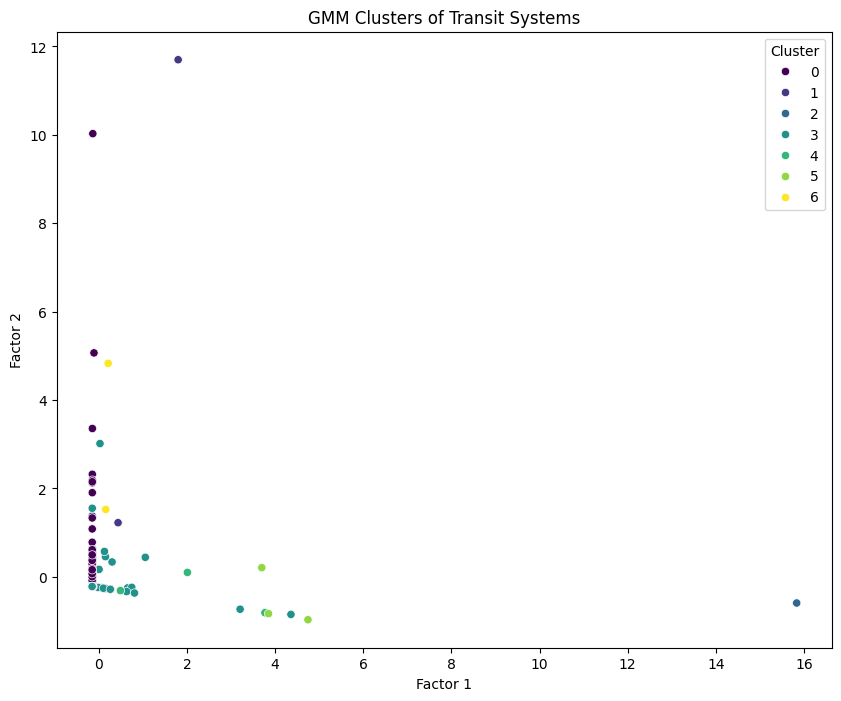

Total Operating Hours  \
Agency                                                                      
MTA New York City Transit                                             0.0   
New Jersey Transit Corporation                                        0.0   
Washington Metropolitan Area Transit Authority                        0.0   
Los Angeles County Metropolitan Transportation ...                    0.0   
Chicago Transit Authority                                             0.0   

                                                    Total Employees  \
Agency                                                                
MTA New York City Transit                                       0.0   
New Jersey Transit Corporation                                  0.0   
Washington Metropolitan Area Transit Authority                  0.0   
Los Angeles County Metropolitan Transportation ...              0.0   
Chicago Transit Authority                                       0.0   

                                                    Number of Operating Fleets  \
Agency                                                                           
MTA New York City Transit                                              50095.0   
New Jersey Transit Corporation                                         26312.0   
Washington Metropolitan Area Transit Authority                         11228.0   
Los Angeles County Metropolitan Transportation ...                     17563.0   
Chicago Transit Authority                                               4360.0   

                                                      Ridership  \
Agency                                                            
MTA New York City Transit                           491106831.0   
New Jersey Transit Corporation                      187806013.0   
Washington Metropolitan Area Transit Authority      122883834.0   
Los Angeles County Metropolitan Transportation ...  110932715.0   
Chicago Transit Authority                           115480485.0   

                                                    Service Area Population  \
Agency                                                                        
MTA New York City Transit                                         8804190.0   
New Jersey Transit Corporation                                   10594013.0   
Washington Metropolitan Area Transit Authority                    5089918.0   
Los Angeles County Metropolitan Transportation ...               10394849.0   
Chicago Transit Authority                                         3207635.0   

                                                    Service Area Sq Miles  \
Agency                                                                      
MTA New York City Transit                                           321.0   
New Jersey Transit Corporation                                     5325.0   
Washington Metropolitan Area Transit Authority                     1349.0   
Los Angeles County Metropolitan Transportation ...                 4099.0   
Chicago Transit Authority                                           310.0   

                                                    Primary UZA Area Sq Miles  \
Agency                                                                          
MTA New York City Transit                                             3248.12   
New Jersey Transit Corporation                                        3248.12   
Washington Metropolitan Area Transit Authority                        1294.51   
Los Angeles County Metropolitan Transportation ...                    1636.83   
Chicago Transit Authority                                             2337.89   

                                                    Diesel (gal)  \
Agency                                                             
MTA New York City Transit                             27958302.0   
New Jersey Transit Corporation                        35585247.0   
Washington Metropolitan Area Transi

In [116]:
### Visulaize GMM

from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Best GMM parameters
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters_gmm = gmm.fit_predict(factors)

# Visualize the GMM clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=factors[:, 0], y=factors[:, 1], hue=clusters_gmm, palette='viridis')
plt.title('GMM Clusters of Transit Systems')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Cluster')
plt.show()

# Output the dataframe with clusters
df['Cluster_GMM'] = clusters_gmm

output_path = r'../../results/NTD_Clustered_Data_with_GMM.csv'

df.to_csv(output_path, index=False)
df.head()


## Additional analysis and plots

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture

In [125]:
# Data Cleaning and Scaling
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(0)
df_scaled = StandardScaler().fit_transform(df[numerical_cols])

# Factor Analysis with n_factors=10
n_factors = 10
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(df_scaled)

# Gaussian Mixture Model Clustering
n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters_gmm = gmm.fit_predict(factors)

# Add cluster labels to the DataFrame
df['Cluster_GMM'] = clusters_gmm

# Summary statistics for each cluster
summary_stats = df.groupby('Cluster_GMM').mean()
summary_stats

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Total Operating Hours  Total Employees  \
Cluster_GMM                                           
0                         0.000000       223.497778   
1                         0.000000       334.642857   
2                         0.000000         0.000000   
3                         1.334385       173.972808   
4                         0.000000         0.000000   
5                         0.000000       139.616250   
6                         0.000000         0.000000   

             Number of Operating Fleets     Ridership  \
Cluster_GMM                                             
0                           2606.000000  1.023008e+07   
1                           4735.285714  3.606047e+07   
2                          50095.000000  4.911068e+08   
3                            319.091483  3.644051e+06   
4                          11567.250000  7.939283e+07   
5                           4450.500000  4.136545e+07   
6                           1458.000000  2.590920e+07   

             Service Area Population  Service Area Sq Miles  \
Cluster_GMM                                                   
0                       6.171533e+05             477.777778   
1                       3.077107e+06            1445.714286   
2                       8.804190e+06             321.000000   
3                       4.689541e+05             562.186120   
4                       6.220949e+06            3113.500000   
5                       4.507259e+06            2352.583333   
6                       1.647385e+06             525.000000   

             Primary UZA Area Sq Miles  Diesel (gal)  Gasoline (gal)  \
Cluster_GMM                                                            
0                           489.591111  1.400073e+06    2.633041e+05   
1                          1079.664286  1.146339e+06    3.852711e+05   
2                          3248.120000  2.795830e+07    3.570980e+06   
3                           533.348202  2.661944e+05    6.921263e+04   
4                          2056.105000  2.316114e+07    7.260478e+05   
5                          1744.126250  3.933740e+06    6.848504e+05   
6                           962.580000  7.354400e+04    5.361100e+04   

             Liquefied Petroleum Gas (gal)  Compressed Natural Gas (gal)  \
Cluster_GMM                                                                
0                             66191.222222                  1.719233e+04   
1                            723755.714286                  5.737271e+06   
2                                 0.000000                  4.824913e+06   
3                              4368.372240                  1.391901e+05   
4                                 0.000000                  6.708592e+05   
5                                 0.000000                  1.584308e+06   
6                                 0.000000                  0.000000e+00   

             Bio Diesel (gal)  Other Fuel (gal/gal equivalent)  \
Cluster_GMM                                                      
0                6.393222e+04                         0.000000   
1                0.000000e+00                         0.000000   
2                0.000000e+00                         0.000000   
3                2.753733e+04                        95.753943   
4                3.182532e+05                         0.000000   
5                7.513333e+02                     11324.500000   
6                3.822684e+06                         0.000000   

             Electric Propulsion (kWh)  Electric Battery (kWh)  \
Cluster_GMM                                                      
0                         2.243898e+06            1.130758e+06   
1                         3.494730e+07            6.524091e+05   
2                         1.552447e+09            6.185990e+05   
3                         1.205149e+06            2.233864e+04   
4                         1.632553e+08            4.804150e+04   
5                         9.867765e+07      

In [127]:
factor_vars = [
    'Total Operating Hours', 
    'Total Employees', 
    'Number of Operating Fleets', 
    'Ridership', 
    'Service Area Population'
]

# Create a new DataFrame with only the specified columns
summary_stats_FA = summary_stats[factor_vars]

# Display the new DataFrame to verify
summary_stats_FA

Total Operating Hours  Total Employees  \
Cluster_GMM                                           
0                         0.000000       223.497778   
1                         0.000000       334.642857   
2                         0.000000         0.000000   
3                         1.334385       173.972808   
4                         0.000000         0.000000   
5                         0.000000       139.616250   
6                         0.000000         0.000000   

             Number of Operating Fleets     Ridership  Service Area Population  
Cluster_GMM                                                                     
0                           2606.000000  1.023008e+07             6.171533e+05  
1                           4735.285714  3.606047e+07             3.077107e+06  
2                          50095.000000  4.911068e+08             8.804190e+06  
3                            319.091483  3.644051e+06             4.689541e+05  
4                          11567.250000  7.939283e+07             6.220949e+06  
5                           4450.500000  4.136545e+07             4.507259e+06  
6                           1458.000000  2.590920e+07             1.647385e+06

### Radar plot

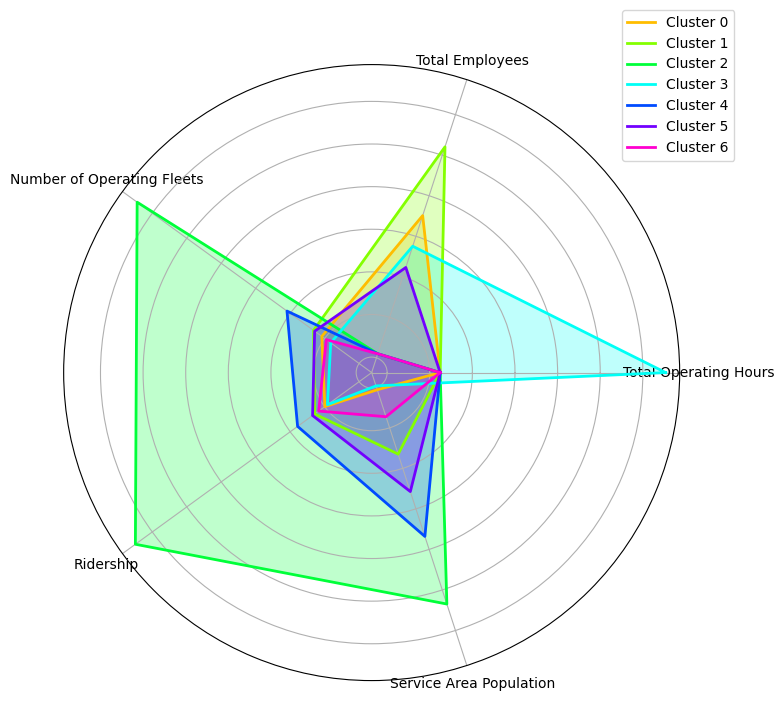

In [147]:
from math import pi

# Function to standardize the data
# The data is standardized, meaning each variable has been scaled to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, making it easier to compare across different dimensions.
def standardize_data(df):
    return (df - df.mean()) / df.std()

# Function to create a combined radar chart for all clusters with standardized data
def create_combined_radar_chart(summary_stats_FA):
    # Standardize the data
    standardized_data = standardize_data(summary_stats_FA)
    
    # Number of variables we're plotting (only the factors used for clustering)
    labels = standardized_data.columns
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start to the end.
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Define colors for the clusters
    colors = sns.color_palette("hsv", len(standardized_data))

    # Plot each cluster
    for cluster, color in zip(standardized_data.index, colors):
        data = standardized_data.loc[cluster].tolist()
        data.append(data[0])
        ax.fill(angles, data, color=color, alpha=0.25)
        ax.plot(angles, data, color=color, linewidth=2, label=f'Cluster {cluster}')

    # Add the feature labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add a title and a legend
    #ax.set_title('Radar Plot of Cluster Profiles', size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Generate the combined radar chart
create_combined_radar_chart(summary_stats_FA)


### Replace FA transforemd data with PCA transforemed data


In [133]:
# PCA Analysis
n_components = 10
pca = PCA(n_components=n_components)
pca_factors = pca.fit_transform(df_scaled)

# PCA loadings
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=numerical_cols)

# Important variables identified by PCA (top variables in the first few principal components)
important_vars = [
    'Ridership', 
    'Number of Operating Fleets', 
    'Total Diesel (gal)', 
    'Total kWh', 
    'Electric Propulsion (kWh)', 
    'Diesel (gal)', 
    'Gasoline (gal)', 
    'Service Area Population', 
    'Service Area Sq Miles', 
    'Primary UZA Area Sq Miles'
]

# Gaussian Mixture Model Clustering with PCA transformed data
n_clusters = 7
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters_gmm = gmm.fit_predict(pca_factors)

# Add cluster labels to the DataFrame
df['Cluster_GMM'] = clusters_gmm

# Summary statistics for each cluster
summary_stats = df.groupby('Cluster_GMM')[important_vars].mean()
print(summary_stats)

                Ridership  Number of Operating Fleets  Total Diesel (gal)  \
Cluster_GMM                                                                 
0            3.028470e+06                  273.850000        5.173779e+05   
1            2.200692e+07                 3720.500000        4.187469e+06   
2            4.911068e+08                50095.000000        3.635420e+07   
3            8.918978e+06                  838.659574        7.324955e+05   
4            6.231560e+05                   76.000000        0.000000e+00   
5            9.903334e+07                10832.444444        1.834204e+07   
6            3.016640e+07                 3930.125000        6.447162e+06   

                Total kWh  Electric Propulsion (kWh)  Diesel (gal)  \
Cluster_GMM                                                          
0            4.791756e+05               4.410349e+05  2.523354e+05   
1            8.428367e+06               7.699547e+06  1.889409e+06   
2            1.553066e+09 

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


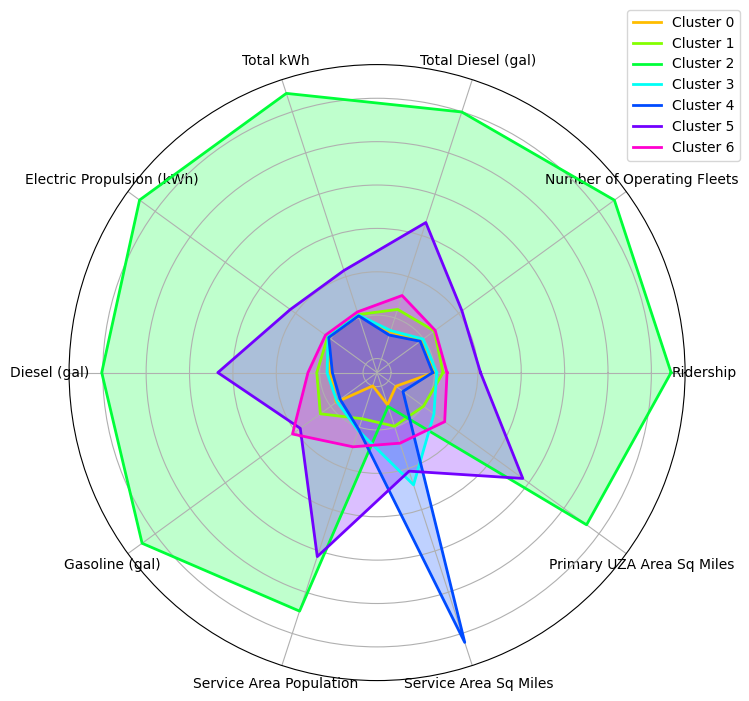

In [150]:
# The data is standardized, meaning each variable has been scaled to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, making it easier to compare across different dimensions.

# Function to standardize the data
def standardize_data(df):
    return (df - df.mean()) / df.std()

# Function to create a combined radar chart for all clusters with standardized data
def create_combined_radar_chart(summary_stats, colors):
    # Standardize the data
    standardized_data = standardize_data(summary_stats)
    
    # Number of variables we're plotting (only the important variables)
    labels = standardized_data.columns
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start to the end.
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each cluster
    for cluster, color in zip(standardized_data.index, colors):
        data = standardized_data.loc[cluster].tolist()
        data.append(data[0])
        ax.fill(angles, data, color=color, alpha=0.25)
        ax.plot(angles, data, color=color, linewidth=2, label=f'Cluster {cluster}')

    # Add the feature labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Add a title and a legend
    #ax.set_title('Radar Plot of Cluster Profiles', size=20, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Define a consistent color palette
colors = sns.color_palette("hsv", n_clusters)

# Generate the combined radar chart
create_combined_radar_chart(summary_stats, colors)


##### Cluster 1 (Green): This cluster has high values across almost all variables, particularly Electric Propulsion (kWh), Total Diesel (gal), and Total kWh. This indicates that the systems in this cluster have extensive energy usage and diesel consumption, covering a samll service area which is populated .
##### Cluster 4 (Blue): This cluster has high values in Service area but lower values in energy consumption.
##### Cluster 6 (Magenta): This cluster has relatively moderate values across most variables but higher in Diesel (gal). Systems in this cluster might balance different energy sources with a leaning towards diesel.

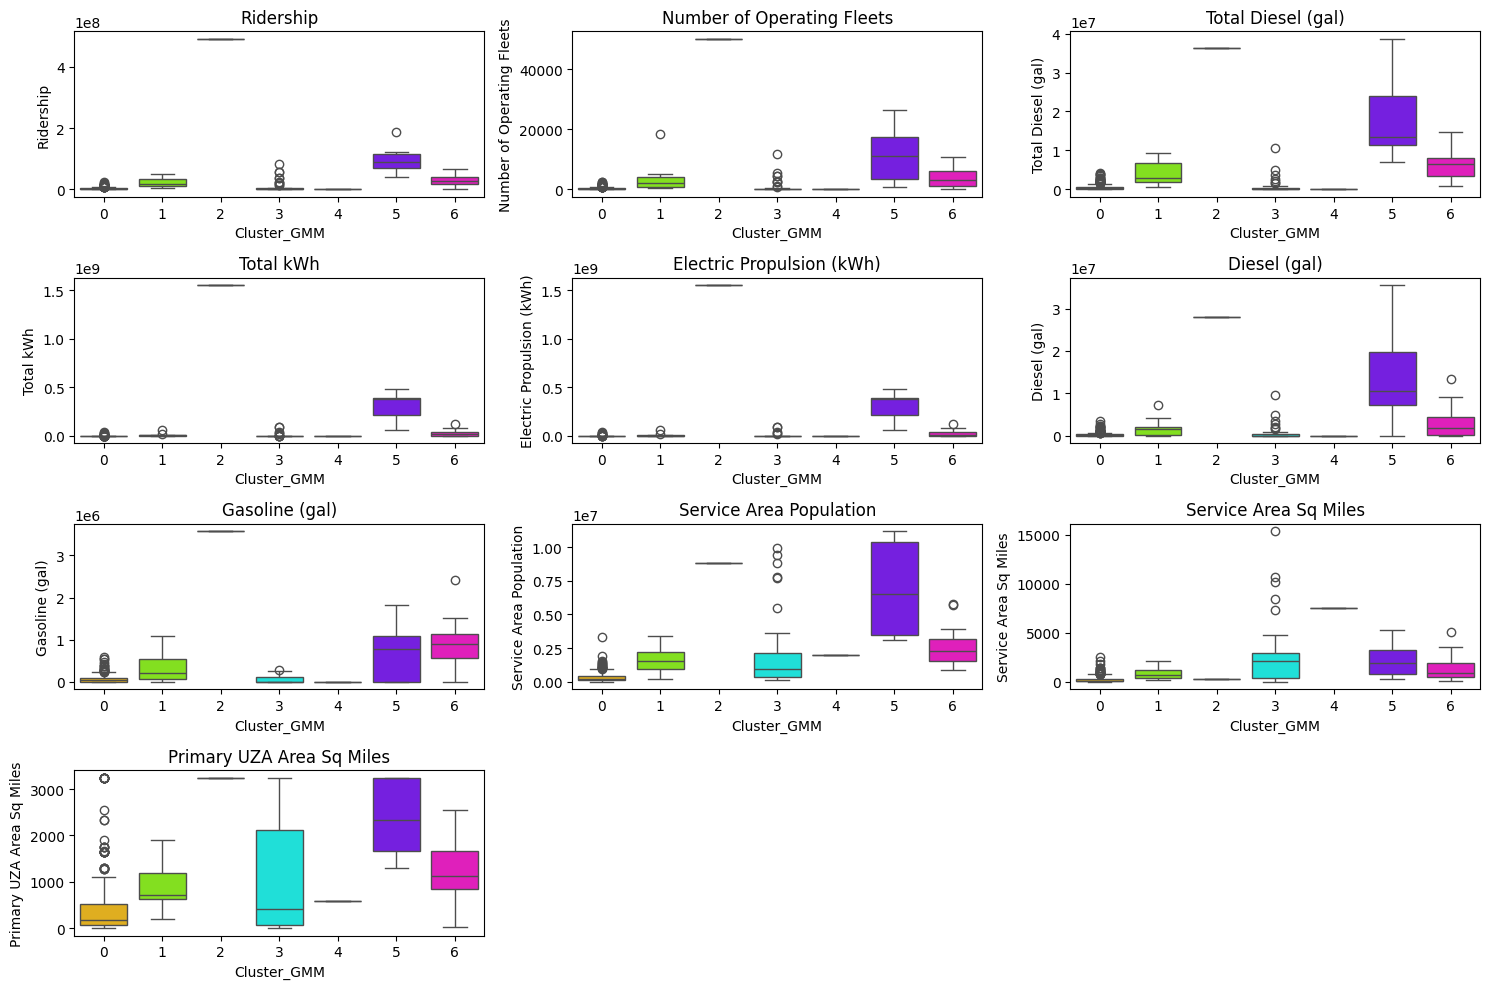

In [151]:
# Box plots for each feature within clusters
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_vars, 1):
    plt.subplot((len(important_vars) // 3) + 1, 3, i)
    sns.boxplot(x='Cluster_GMM', y=col, data=df, hue='Cluster_GMM', palette=colors, legend=False)
    plt.title(col)
plt.tight_layout()
plt.show()

##### Cluster 5: Generally has the highest values across most features, indicating systems with large ridership, high energy consumption (both diesel and kWh), and large service areas.
##### Cluster 0 and Cluster 2: Generally have the lowest values across most features, indicating smaller systems with lower energy consumption and ridership.

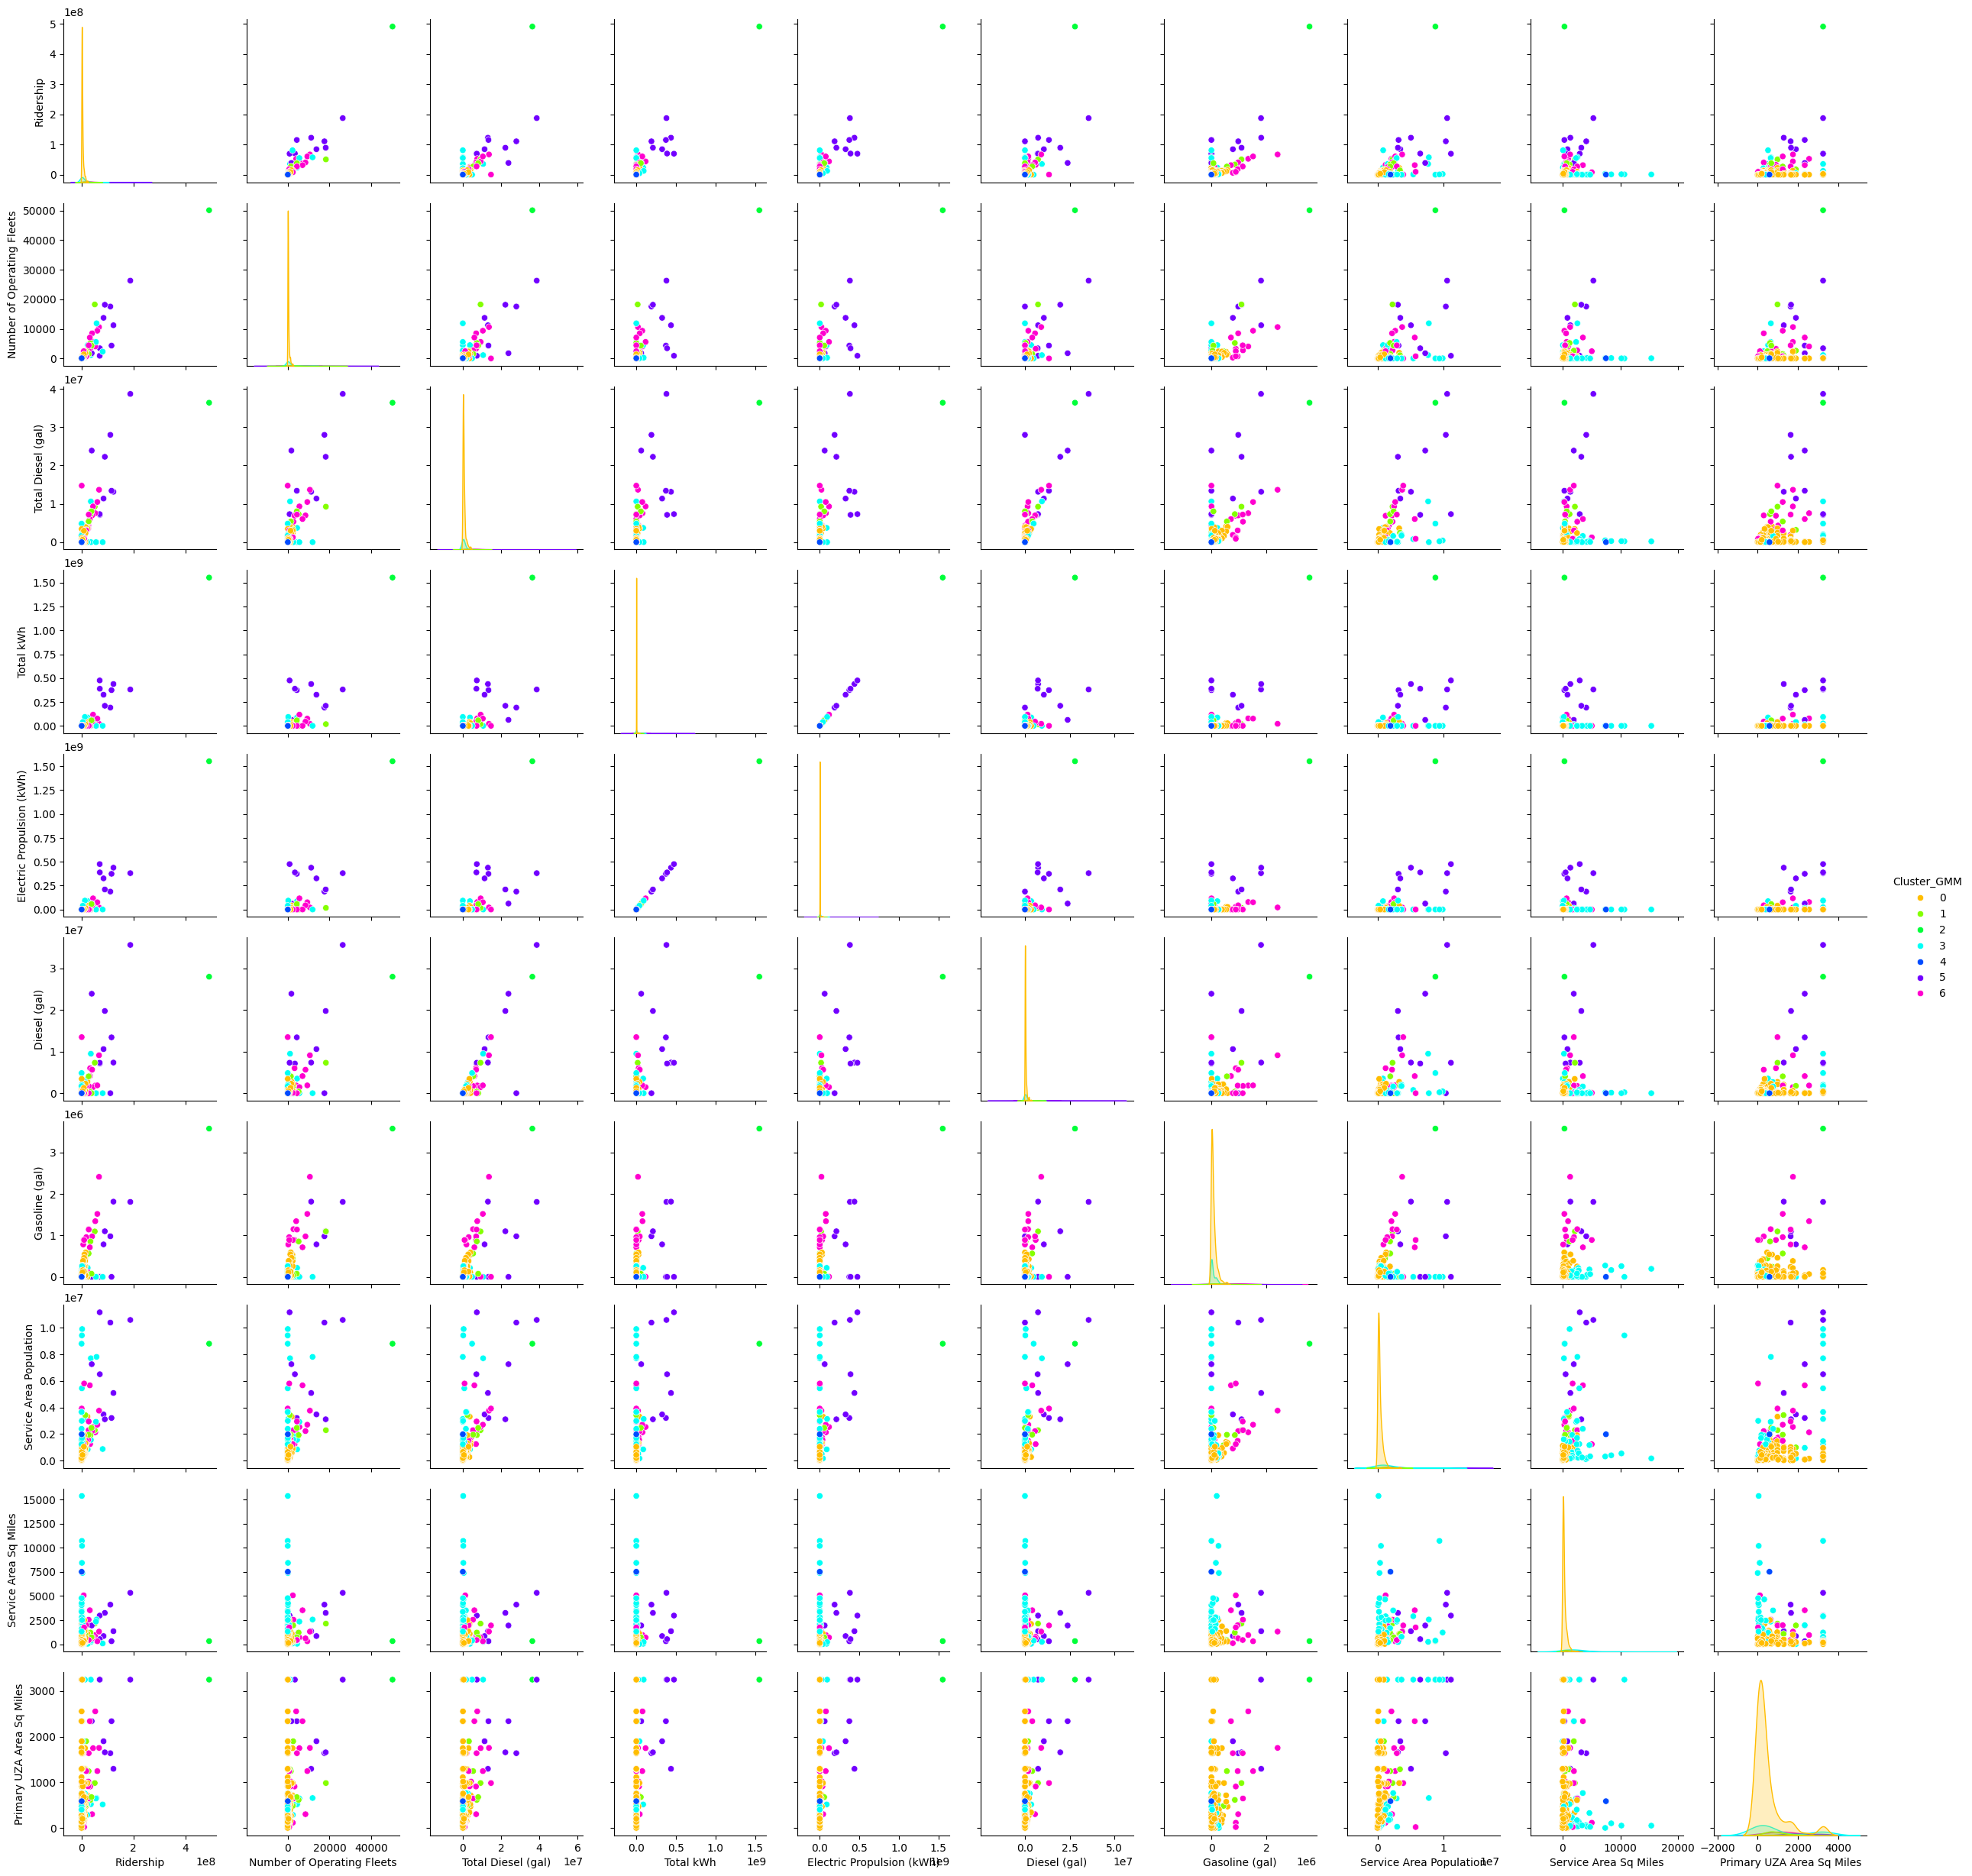

In [152]:
# Pair plot to observe relationships between features within clusters
sns.pairplot(df, hue='Cluster_GMM', vars=important_vars, palette=colors)
plt.show()

##### Key observations:
##### High Ridership and Fleet Size correlation: Clusters 4 and 6 show a strong positive correlation between ridership and the number of operating fleets. This indicates that systems with higher ridership tend to have a larger number of operating fleets.
##### High Fuel and Energy Consumption: Clusters 5 and 6 are characterized by high values across multiple fuel types (Total Diesel (gal), Total kWh, Electric Propulsion (kWh), and Gasoline (gal)). This suggests that these clusters represent larger transit systems with significant energy consumption.
##### Service Area Correlation: There is a noticeable positive correlation between service area population and service area square miles in Clusters 5 and 6, indicating that larger service areas tend to have larger populations. This highlights the scale of operations in these clusters.

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_22340\2677407903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_GMM', data=df, palette=colors)


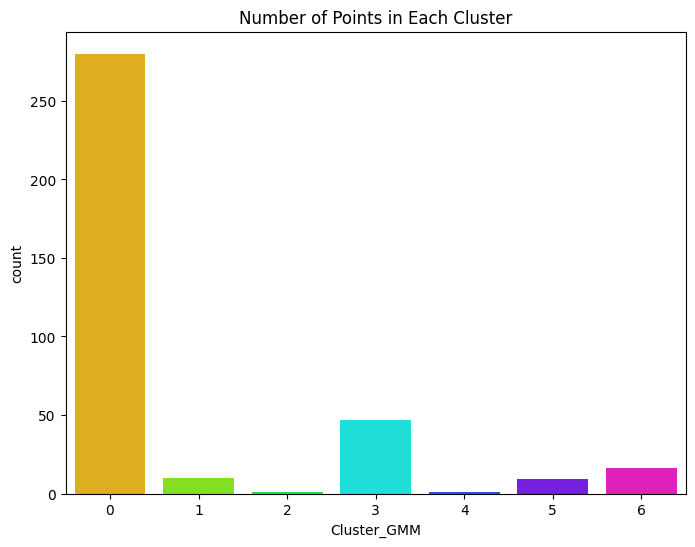

In [154]:
# Plot to show the number of points in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_GMM', data=df, palette=colors)
plt.title('Number of Points in Each Cluster')
plt.show()

##### The dominance of Cluster 0 suggests that many transit systems share similar characteristics.
##### The presence of smaller clusters indicates variability and specialization among other transit systems.

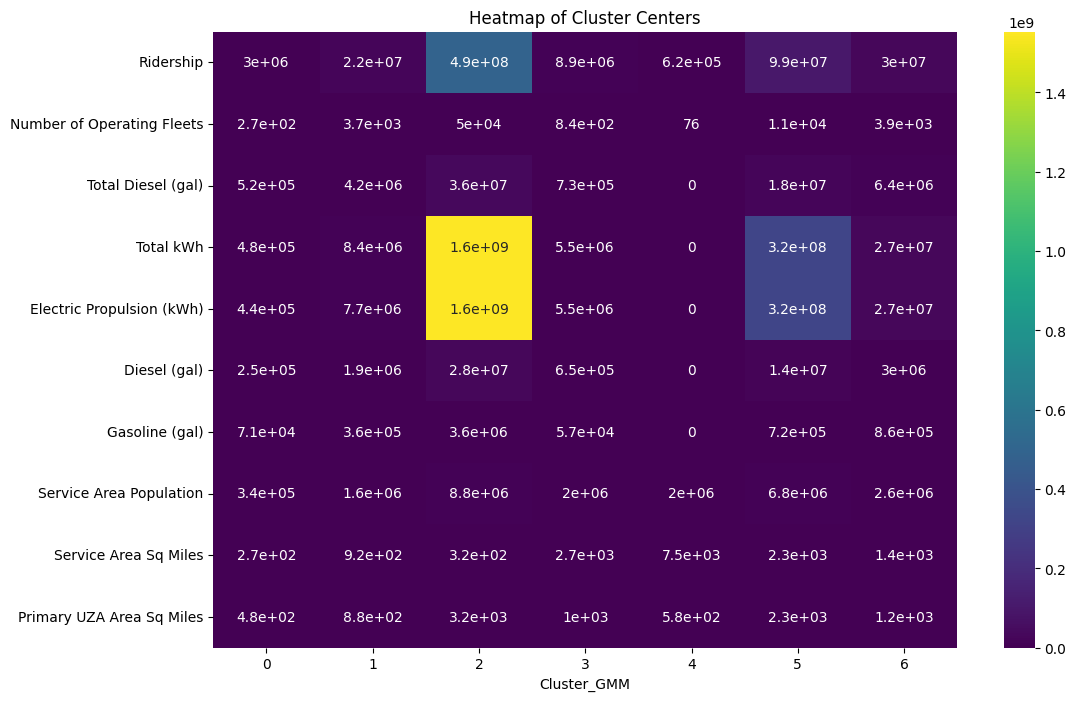

In [145]:
# Heatmap of cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(summary_stats.T, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Centers')
plt.show()

##### Key takeaways:
##### Cluster 2: Represents systems with extremely high ridership, large fleets, and significant fuel and energy consumption, indicating large, high-demand transit systems.
##### Cluster 5: Characterized by very high ridership, substantial diesel and kWh consumption, and large service areas, indicating another group of large, high-demand systems but with possibly different operational characteristics than Cluster 2.
##### Cluster 0: Represents the majority of the data points, indicating small to moderate systems with low ridership, fleet size, and fuel consumption.
##### Cluster 4: Contains systems with zero diesel and electric propulsion usage, possibly indicating a specialized group of systems with unique characteristics or data anomalies.
##### Clusters 1, 3, and 6: These clusters have moderate values across various features, indicating medium-sized systems with different operational scales and characteristics compared to the more extreme clusters (0, 2, and 5).